# KENDAXA ASSIGNMENT - MACHINE LEARNING POSITION
## S&P500 Regression - *by Jan Kořínek*

### Deliverable goals
#### Regression task

Your goal is to perform exploratory data analysis (EDA)
and to train and compare few models on a regression task.
Your task is to predict day-ahed daily volumes of the S&P
500 index using any available information from the past;
i.e., you are going to predict the volume v t+1 using the
information available on days t , t − 1 , . . . .

Evaluate the models performance on out-of-sample data
using data from 2017 and 2018 (i.e., January 1st, 2017 –
December 31st , 2018).

Do not forget that you can use (and should) data outside
the series itself — for example, calendar with known events.

Since your goal is to evaluate and compare several
models along with finding the best, you have to use some
kind of cross-validation as the dataset is quite small (which
is very common for some of the real world datasets).

If you find it applicable, use statistical tests in the EDA
and comparison to distinguis.

#### Report and scope

You are required to write a brief report in the PDF format
(L A TEXusage is recommend) summarizing the approaches
and presenting the results for all three subtasks. It is rec-
ommend to use figures and plots where it will help you
make your point. The report should contain all the necessary
details to understand what approach you have undertaken,
what were the results and how you interpret them.

our report should summarize the main results of your EDA
but it is sufficient to have the details of the EDA only in the
Jupyter notebook. Briefly (very briefly) introduce the used
models. You should compare the models with regards to
more than one metric each with explanation when is each of
the metrics preferable. You should also state your trust in the
individual models — e.g., that even if some model gives you
very good results, you still might not trust it because it is
sensitive to the data changes. Compare the models also with
respect to their robustness and interpretability. Interpret the
few models you will select as your top ranking candidates,
show which features they are relying the most, etc. Where
applicable, perform formal statistical tests to support your
results.

Please, also state the limitations of your work and direc-
tions, in which it can be expanded — it is expected that you
will not be able to exhaust all possible approaches in the
limited time. Please state which of the possible expansions
are most promising and why.

The report is expected to have about 5–12 pages when using
two-column format with figures but there are no hard limits
as the completeness of the presented information is the
goal (as long as there are no empty sentences or fillers, the
length will not be evaluated).

### Content

1. [S&P500 dataset preparation and merging with calendar events](#dataset-preparation)

2. [Initial dataset exploration](#dataset-exploration)

    2.1 [Data summary](#data-summary)

    2.2 [Missing values check](#missing-vals)

    2.3 [Handling missing values](#handling-missing-vals)

    2.4 [Correlation pairs visualization and pairs sorting](#corr-visu)

    2.5 [Outliers detection and data consistency verification](#outliers)

3. [Statistical evaluation - Closing price](#close-statistic)

    3.1 [Additive Decomposition](#close-decomposition)

    3.2 [Stationarity check](#close-stationarity)

    3.3 [Correlogram](#close-correlogram)

4. [Statistical evaluation - Volume](#volume-statistic)

    4.1 [Additive Decomposition](#volume-decomposition)

    4.2 [Stationarity check](#volume-stationarity)

    4.3 [Correlogram](#volume-correlogram)

5. [Feature engineering](#feature-eng)

6. [Models training](#models-training)

    6.1 [Training of the multiple models](#training)

    6.2 [Dataset with predicted values finalization](#finalization)

7. [Results discussion](#results-discussion)

8. [Conclusion](#conclusion)

### 1. S&P500 dataset preparation and merging with calendar events <a name="dataset-preparation"></a>

S&P500 financial data are scraped from this [link](https://finance.yahoo.com/quote/%5EGSPC/) in initial length from *1-1-1990* to *5-11-2021*. In similar range, financial events expected to cause high volatility on US market are filtered and scraped from this [economic calendar](https://www.investing.com/economic-calendar/).

Script `prepare_dataset.py` is responsible for loading raw data into Pandas dataframes. It cleans and modify S&P500 and calendar events raw data into usable format for further analysis. It also creates pivot table from calendar events data and parse S&P500 and events pivot dataset together. Finally, saves such modified dataframe into *data* folder.

In [1]:
# Load and extract data from raw CSVs into dataframes for S&P500 and relevant events
%run lib/prepare_dataset.py

# Show processed df
sp500_calendar

Processing raw data...


/mnt/Data/JK WORKS/Artificial_Intelligence/_Projects/20211107_Kendaxa_Tasks/03_Regression-SP500_Volumes_Prediction/venv/lib/python3.9/site-packages/dateparser/date_parser.py:35: PytzUsageWarning: The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html
  date_obj = stz.localize(date_obj)


Dataset processing finished in: 0:00:20


Open     High      Low    Close        Volume  \
Date                                                           
1990-01-02   353.40   359.69   351.98   359.69  1.620700e+08   
1990-01-03   359.69   360.59   357.89   358.76  1.923300e+08   
1990-01-04   358.76   358.76   352.89   355.67  1.770000e+08   
1990-01-05   355.67   355.67   351.35   352.20  1.585300e+08   
1990-01-08   352.20   354.24   350.54   353.79  1.401100e+08   
...             ...      ...      ...      ...           ...   
2012-07-01  4699.26  4718.50  4681.32  4697.53  3.491150e+09   
2012-09-01  4699.26  4718.50  4681.32  4697.53  3.491150e+09   
2012-12-01  4699.26  4718.50  4681.32  4697.53  3.491150e+09   
2013-06-01  4699.26  4718.50  4681.32  4697.53  3.491150e+09   
2020-03-15  4699.26  4718.50  4681.32  4697.53  3.491150e+09   

            ADP Nonfarm Employment Chang  Building Permit  \
Date                                                        
1990-01-02                           NaN              NaN   
1990-01-03                           NaN              NaN   
1990-01-04                           NaN              NaN   
1990-01-05                           NaN              NaN   
1990-01-08                           NaN              NaN   
...                                  ...              ...   
2012-07-01                           0.0        1589000.0   
2012-09-01                           0.0        1589000.0   
2012-12-01                           0.0        1589000.0   
2013-06-01                           0.0        1589000.0   
2020-03-15                           0.0        1589000.0   

            CB Consumer Confidenc  Core CP  Core Durable Goods Order  ...  \
Date                                                                  ...   
1990-01-02                    NaN      NaN                       NaN  ...   
1990-01-03                    NaN      NaN                       NaN  ...   
1990-01-04                    NaN      NaN                       NaN  ...   
1990-01-05                    NaN      NaN                       NaN  ...   
1990-01-08                    NaN      NaN                       NaN  ...   
...                           ...      ...                       ...  ...   
2012-07-01                   90.6      0.2                       0.4  ...   
2012-09-01                   90.6      0.2                       0.4  ...   
2012-12-01                   90.6      0.2                       0.4  ...   
2013-06-01                   90.6      0.2                       0.4  ...   
2020-03-15                   90.6      0.2                       0.4  ...   

            Initial Jobless Claim  JOLTs Job Opening  New Home Sale  \
Date                                                                  
1990-01-02                    NaN                NaN            NaN   
1990-01-03                    NaN                NaN            NaN   
1990-01-04                    NaN                NaN            NaN   
1990-01-05                    NaN                NaN            NaN   
1990-01-08                    NaN                NaN            NaN   
...                           ...                ...            ...   
2012-07-01               349100.0          3790000.0       619000.0   
2012-09-01               349100.0          3640000.0       619000.0   
2012-12-01               349100.0          3740000.0       619000.0   
2013-06-01               349100.0          3830000.0       619000.0   
2020-03-15               349100.0          3830000.0       619000.0   

            Nonfarm Payroll   PP  Pending Home Sale  \
Date                                                  
1990-01-02              NaN  NaN                NaN   
1990-01-03              NaN  NaN                NaN   
1990-01-04              NaN  NaN                NaN   
1990-01-05          96000.0  NaN                NaN   
1990-01-08          96000.0  NaN                NaN   
...                     ...  ...                ...   
2012-07-01         162

### 2. Initial dataset exploration <a name="dataset-exploration"></a>

In [2]:
# Libraries Import and Fonts setup
import warnings, datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from lib.misc_functions import print_missing_vals, print_corr_matrix, fix_inconsistency,\
    seasonal_decomposition, stationarity_check, plot_correlogram, print_score, concat_df

# Warnings turn off
warnings.simplefilter('ignore', np.RankWarning)
warnings.filterwarnings('ignore')
warnings.warn('ignore')

pd.set_option("display.max.columns", None)
plt.style.use('seaborn')
%matplotlib inline

SMALL_SIZE = 12
MEDIUM_SIZE = 14
LARGE_SIZE = 16

plt.rcParams['figure.facecolor'] = 'white'
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=LARGE_SIZE)   # fontsize of the figure title

#### 2.1 Data summary <a name="data-summary"></a>

In [3]:
# Check the df head
sp500_calendar.head(5)

Open    High     Low   Close       Volume  \
Date                                                      
1990-01-02  353.40  359.69  351.98  359.69  162070000.0   
1990-01-03  359.69  360.59  357.89  358.76  192330000.0   
1990-01-04  358.76  358.76  352.89  355.67  177000000.0   
1990-01-05  355.67  355.67  351.35  352.20  158530000.0   
1990-01-08  352.20  354.24  350.54  353.79  140110000.0   

            ADP Nonfarm Employment Chang  Building Permit  \
Date                                                        
1990-01-02                           NaN              NaN   
1990-01-03                           NaN              NaN   
1990-01-04                           NaN              NaN   
1990-01-05                           NaN              NaN   
1990-01-08                           NaN              NaN   

            CB Consumer Confidenc  Core CP  Core Durable Goods Order  \
Date                                                                   
1990-01-02                    NaN      NaN                       NaN   
1990-01-03                    NaN      NaN                       NaN   
1990-01-04                    NaN      NaN                       NaN   
1990-01-05                    NaN      NaN                       NaN   
1990-01-08                    NaN      NaN                       NaN   

            Core Retail Sale  Crude Oil Inventorie  Existing Home Sale  \
Date                                                                     
1990-01-02               NaN                   NaN                 NaN   
1990-01-03               NaN                   NaN                 NaN   
1990-01-04               NaN                   NaN                 NaN   
1990-01-05               NaN                   NaN                 NaN   
1990-01-08               NaN                   NaN                 NaN   

            FOMC Meeting Minute  Fed Chairman Bernanke Speak  \
Date                                                           
1990-01-02                  NaN                          NaN   
1990-01-03                  NaN                          NaN   
1990-01-04                  NaN                          NaN   
1990-01-05                  NaN                          NaN   
1990-01-08                  NaN                          NaN   

            Fed Interest Rate Decisio  GD  ISM Manufacturing PM  \
Date                                                              
1990-01-02                        NaN NaN                   NaN   
1990-01-03                        NaN NaN                   NaN   
1990-01-04                        NaN NaN                   NaN   
1990-01-05                        NaN NaN                   NaN   
1990-01-08                        NaN NaN                   NaN   

            ISM Non-Manufacturing PM  Initial Jobless Claim  \
Date                                                          
1990-01-02                       NaN                    NaN   
1990-01-03                       NaN                    NaN   
1990-01-04                       NaN                    NaN   
1990-01-05                       NaN                    NaN   
1990-01-08                       NaN                    NaN   

            JOLTs Job Opening  New Home Sale  Nonfarm Payroll  PP  \
Date                                                                
1990-01-02                NaN            NaN              NaN NaN   
1990-01-03                NaN            NaN              NaN NaN   
1990-01-04                NaN            NaN              NaN NaN   
1990-01-05                NaN            NaN          96000.0 NaN   
1990-01-08                NaN            NaN          96000.0 NaN   

            Pending Home Sale  Philadelphia Fed Manufacturing Inde  \
Date                                                                 
1990-01-02                NaN                                  NaN   
1990-01-03                NaN                                  NaN   
1990-01-04             

In [4]:
# Check the df tail
sp500_calendar.tail(5)

Open    High      Low    Close        Volume  \
Date                                                          
2012-07-01  4699.26  4718.5  4681.32  4697.53  3.491150e+09   
2012-09-01  4699.26  4718.5  4681.32  4697.53  3.491150e+09   
2012-12-01  4699.26  4718.5  4681.32  4697.53  3.491150e+09   
2013-06-01  4699.26  4718.5  4681.32  4697.53  3.491150e+09   
2020-03-15  4699.26  4718.5  4681.32  4697.53  3.491150e+09   

            ADP Nonfarm Employment Chang  Building Permit  \
Date                                                        
2012-07-01                           0.0        1589000.0   
2012-09-01                           0.0        1589000.0   
2012-12-01                           0.0        1589000.0   
2013-06-01                           0.0        1589000.0   
2020-03-15                           0.0        1589000.0   

            CB Consumer Confidenc  Core CP  Core Durable Goods Order  \
Date                                                                   
2012-07-01                   90.6      0.2                       0.4   
2012-09-01                   90.6      0.2                       0.4   
2012-12-01                   90.6      0.2                       0.4   
2013-06-01                   90.6      0.2                       0.4   
2020-03-15                   90.6      0.2                       0.4   

            Core Retail Sale  Crude Oil Inventorie  Existing Home Sale  \
Date                                                                     
2012-07-01              -0.3            -4050000.0           4410000.0   
2012-09-01              -0.3            -4050000.0           4410000.0   
2012-12-01              -0.3            -4050000.0           4410000.0   
2013-06-01              -0.3            -4050000.0           4410000.0   
2020-03-15              -0.3            -4050000.0           4410000.0   

            FOMC Meeting Minute  Fed Chairman Bernanke Speak  \
Date                                                           
2012-07-01                  0.0                          0.0   
2012-09-01                  0.0                          0.0   
2012-12-01                  0.0                          0.0   
2013-06-01                  0.0                          0.0   
2020-03-15                  0.0                          0.0   

            Fed Interest Rate Decisio   GD  ISM Manufacturing PM  \
Date                                                               
2012-07-01                       0.25  2.0                  49.0   
2012-09-01                       0.25  2.0                  49.0   
2012-12-01                       0.25  2.0                  49.0   
2013-06-01                       0.25  2.0                  49.0   
2020-03-15                       0.25  2.0                  49.0   

            ISM Non-Manufacturing PM  Initial Jobless Claim  \
Date                                                          
2012-07-01                      52.5               349100.0   
2012-09-01                      52.5               349100.0   
2012-12-01                      52.5               349100.0   
2013-06-01                      52.5               349100.0   
2020-03-15                      52.5               349100.0   

            JOLTs Job Opening  New Home Sale  Nonfarm Payroll   PP  \
Date                                                                 
2012-07-01          3790000.0       619000.0         162000.0  0.5   
2012-09-01          3640000.0       619000.0         162000.0  0.5   
2012-12-01          3740000.0       619000.0         162000.0  0.5   
2013-06-01          3830000.0       619000.0         162000.0  0.5   
2020-03-15          3830000.0       619000.0         162000.0  0.5   

            Pending Home Sale  Philadelphia Fed Manufacturing Inde  \
Date                                                                 
2012-07-01               -2.4                                 -5.5   
2012-09-01               -2.4                       

In [5]:
# Check sampled data
sp500_calendar.sample(10)

Open     High      Low    Close        Volume  \
Date                                                           
2020-01-21  3321.03  3329.79  3316.61  3320.79  4.105340e+09   
2005-10-12  1184.87  1190.02  1173.65  1177.68  2.491280e+09   
2006-05-08  1325.76  1326.70  1322.87  1324.66  2.151300e+09   
1990-08-27   311.55   323.11   311.55   321.44  1.601500e+08   
1995-08-02   559.64   565.62   557.87   558.80  3.743300e+08   
2018-10-17  2811.67  2816.94  2781.81  2809.21  3.321710e+09   
1996-04-01   645.50   653.87   645.50   653.73  3.921200e+08   
2011-06-22  1295.48  1298.61  1286.79  1287.14  3.718420e+09   
2010-04-20  1199.04  1208.58  1199.04  1207.17  5.316590e+09   
2020-08-24  3418.09  3432.09  3413.13  3431.28  3.728690e+09   

            ADP Nonfarm Employment Chang  Building Permit  \
Date                                                        
2020-01-21                      202000.0        1416000.0   
2005-10-12                      175000.0              NaN   
2006-05-08                      148000.0              NaN   
1990-08-27                           NaN              NaN   
1995-08-02                           NaN              NaN   
2018-10-17                      230000.0        1241000.0   
1996-04-01                           NaN              NaN   
2011-06-22                       38000.0         610000.0   
2010-04-20                      -23000.0         690000.0   
2020-08-24                      167000.0        1495000.0   

            CB Consumer Confidenc  Core CP  Core Durable Goods Order  \
Date                                                                   
2020-01-21                  126.5      0.1                       0.0   
2005-10-12                  105.5      0.1                       NaN   
2006-05-08                  109.8      0.2                       NaN   
1990-08-27                  101.7      0.5                       NaN   
1995-08-02                  101.4      0.2                       NaN   
2018-10-17                  138.4      0.1                       0.1   
1996-04-01                   98.4      0.2                       NaN   
2011-06-22                   60.8      0.3                      -1.5   
2010-04-20                   52.5      0.0                       0.9   
2020-08-24                   92.6      0.6                       3.3   

            Core Retail Sale  Crude Oil Inventorie  Existing Home Sale  \
Date                                                                     
2020-01-21               0.7            -2549000.0           5350000.0   
2005-10-12               1.6             -110000.0           7230000.0   
2006-05-08               0.4              980000.0           6700000.0   
1990-08-27               NaN              130000.0           3190000.0   
1995-08-02               0.2            -1660000.0           3960000.0   
2018-10-17              -0.1             6490000.0           5340000.0   
1996-04-01               1.1             -220000.0           4200000.0   
2011-06-22               0.3            -1700000.0           4810000.0   
2010-04-20               0.6            -2200000.0           5020000.0   
2020-08-24               1.9            -1632000.0           5860000.0   

            FOMC Meeting Minute  Fed Chairman Bernanke Speak  \
Date                                                           
2020-01-21                  0.0                          0.0   
2005-10-12                  NaN                          NaN   
2006-05-08                  NaN                          NaN   
1990-08-27                  NaN                          NaN   
1995-08-02                  NaN                          NaN   
2018-10-17                  0.0                          0.0   
1996-04-01                  NaN                          NaN   
2011-06-22                  0.0                          0.0   
2010-04-20                  0.0                          0.0   
2020-08-24                  0.0                        

In [6]:
# Check the data types
sp500_calendar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8134 entries, 1990-01-02 to 2020-03-15
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Open                                 8134 non-null   float64
 1   High                                 8134 non-null   float64
 2   Low                                  8134 non-null   float64
 3   Close                                8134 non-null   float64
 4   Volume                               8134 non-null   float64
 5   ADP Nonfarm Employment Chang         5250 non-null   float64
 6   Building Permit                      3563 non-null   float64
 7   CB Consumer Confidenc                8112 non-null   float64
 8   Core CP                              8112 non-null   float64
 9   Core Durable Goods Order             3558 non-null   float64
 10  Core Retail Sale                     7565 non-null   float64
 11  Crude Oil Inventorie

In [7]:
# Descriptive statistics summary
sp500_calendar.describe()

Open         High          Low        Close        Volume  \
count  8134.000000  8134.000000  8134.000000  8134.000000  8.134000e+03   
mean   1449.927989  1458.182617  1441.153016  1450.232155  2.335081e+09   
std     944.731760   948.723418   940.657613   944.861231  1.810961e+09   
min     295.450000   301.450000   294.510000   295.460000  1.499000e+07   
25%     866.555000   876.105000   854.000000   868.187500  5.835575e+08   
50%    1236.120000  1244.935000  1226.715000  1236.180000  2.145965e+09   
75%    1851.600000  1866.167500  1841.067500  1852.472500  3.643360e+09   
max    4699.260000  4718.500000  4681.320000  4697.530000  1.145623e+10   

       ADP Nonfarm Employment Chang  Building Permit  CB Consumer Confidenc  \
count                   5250.000000     3.563000e+03            8112.000000   
mean                  109165.175619     1.148633e+06              94.627305   
std                   212259.647327     1.239781e+06              26.796562   
min                  -742000.000000     4.900000e+05              25.000000   
25%                     9000.000000     7.470000e+05              72.900000   
50%                   154000.000000     1.086000e+06              97.400000   
75%                   205000.000000     1.298000e+06             113.175000   
max                   978000.000000     1.700000e+07             144.700000   

           Core CP  Core Durable Goods Order  Core Retail Sale  \
count  8112.000000               3558.000000       7565.000000   
mean      0.194601                  0.157645          0.344455   
std       0.122494                  1.392928          1.470607   
min      -0.400000                 -7.400000        -17.200000   
25%       0.100000                 -0.400000          0.000000   
50%       0.200000                  0.200000          0.300000   
75%       0.200000                  0.800000          0.800000   
max       0.900000                  4.000000         12.400000   

       Crude Oil Inventorie  Existing Home Sale  FOMC Meeting Minute  \
count          8.112000e+03        8.112000e+03               3530.0   
mean           2.068719e+05        5.007514e+06                  0.0   
std            5.372307e+06        9.837624e+05                  0.0   
min           -7.700000e+07        2.900000e+06                  0.0   
25%           -1.800000e+06        4.340000e+06                  0.0   
50%            1.180000e+05        5.100000e+06                  0.0   
75%            1.890000e+06        5.520000e+06                  0.0   
max            9.900000e+07        7.250000e+06                  0.0   

       Fed Chairman Bernanke Speak  Fed Interest Rate Decisio           GD  \
count                       3558.0                8000.000000  3557.000000   
mean                           0.0                   2.677969     1.864071   
std                            0.0                   2.230773     6.549026   
min                            0.0                   0.250000   -32.900000   
25%                            0.0                   0.250000     1.300000   
50%                            0.0                   2.000000     2.200000   
75%                            0.0                   5.250000     3.100000   
max                            0.0                   8.000000    33.400000   

       ISM Manufacturing PM  ISM Non-Manufacturing PM  Initial Jobless Claim  \
count           8112.000000               6216.000000            8112.000000   
mean              52.444305                 54.897362          353359.359467   
std                5.115314                  4.175702          107935.865853   
min               32.400000                 37.300000           -4000.000000   
25%               49.700000                 53.000000          303700.000000   
50%               52.700000                 55.400000          340180.000000   
75%               55.800000                 57.500000          397090.000000   
max               64.700000            

Dataset itself contains 8134 data points with 28 continuous features and one target for prediction. It contains only floating values representing numerical feature types.

#### 2.2 Missing values check <a name="missing-vals"></a>

Open - Missing Value Summary:
--------------------------------------------------
0 

High - Missing Value Summary:
--------------------------------------------------
0 

Low - Missing Value Summary:
--------------------------------------------------
0 

Close - Missing Value Summary:
--------------------------------------------------
0 

Volume - Missing Value Summary:
--------------------------------------------------
0 

ADP Nonfarm Employment Chang - Missing Value Summary:
--------------------------------------------------
2909 

Building Permit - Missing Value Summary:
--------------------------------------------------
4571 

CB Consumer Confidenc - Missing Value Summary:
--------------------------------------------------
22 

Core CP - Missing Value Summary:
--------------------------------------------------
473 

Core Durable Goods Order - Missing Value Summary:
--------------------------------------------------
4710 

Core Retail Sale - Missing Value Summary:
-------------------

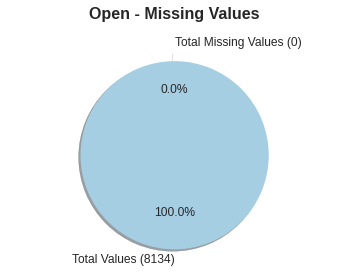

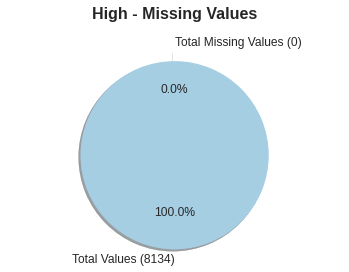

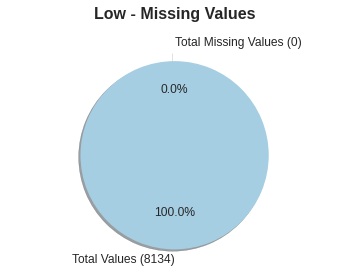

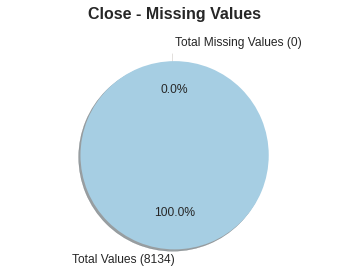

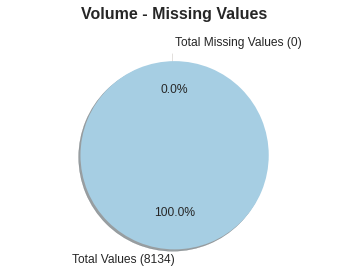

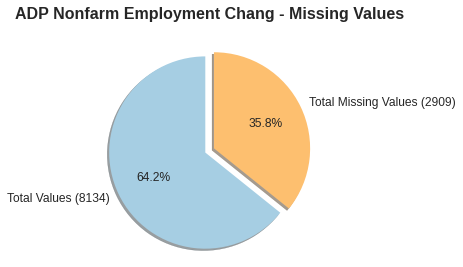

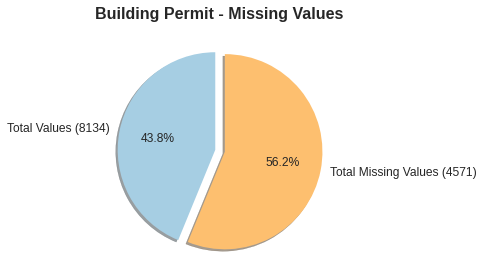

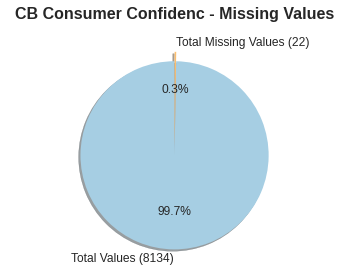

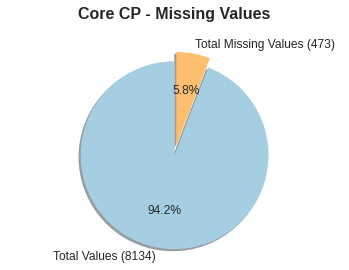

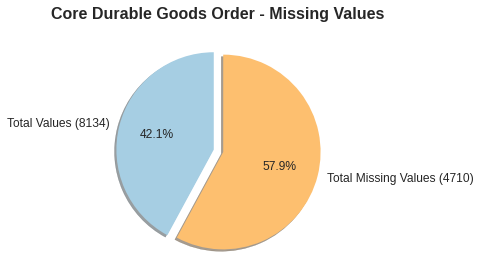

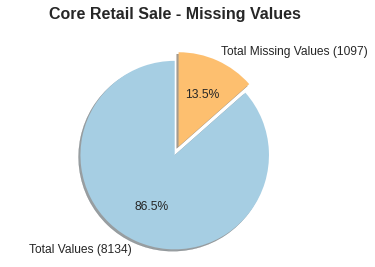

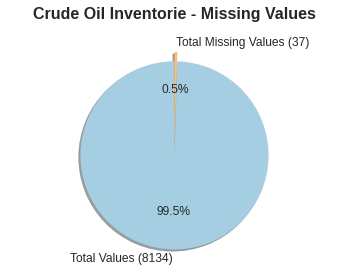

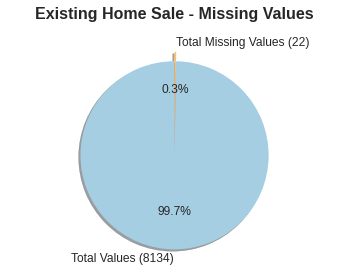

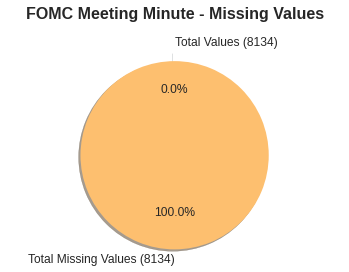

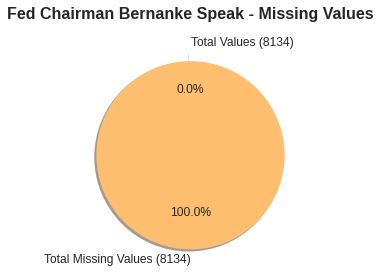

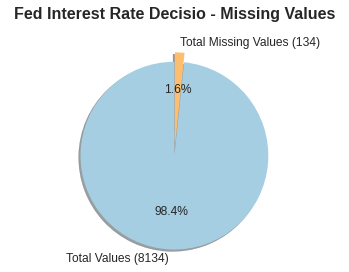

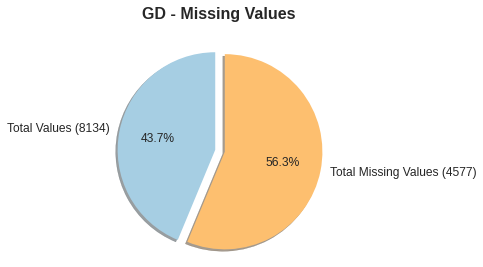

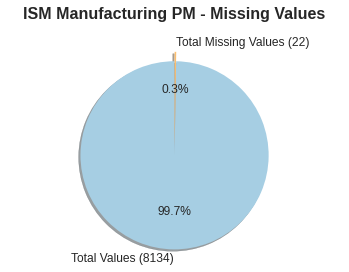

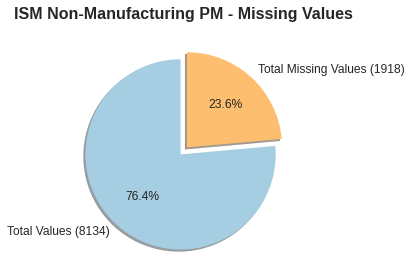

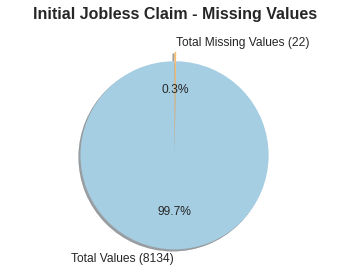

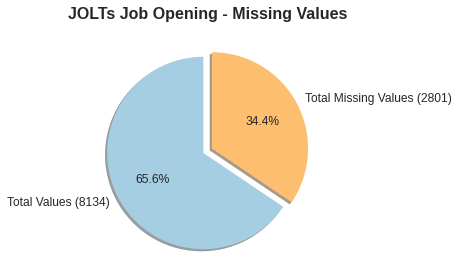

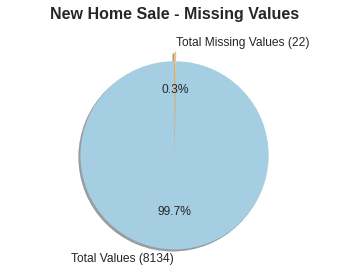

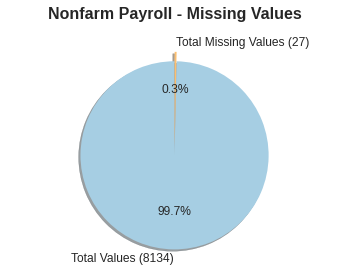

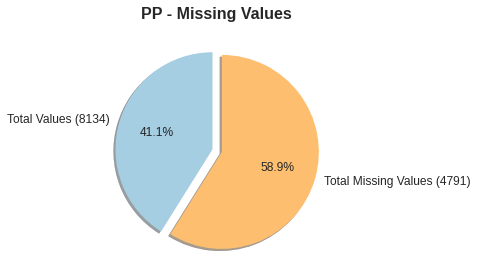

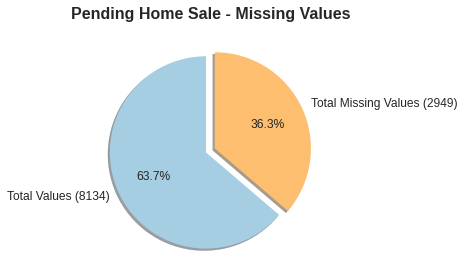

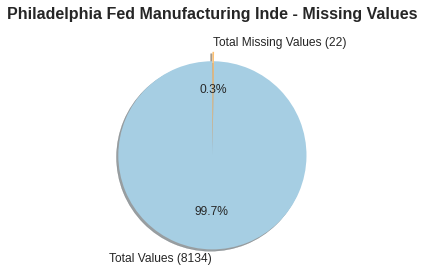

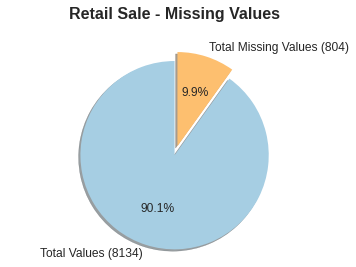

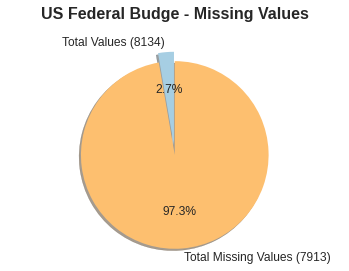

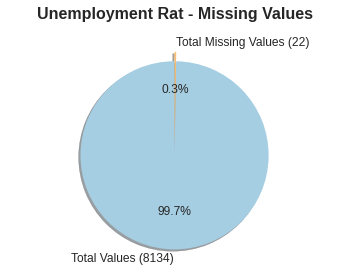

In [8]:
# Missing values summary and plots
sp500_work = print_missing_vals(sp500_calendar)

#### 2.3 Handling missing values <a name="handling-missing-vals"></a>

There are 7 features where missing values count exceeds 50% and 3 features where missing values are between 30-40%. Usage of imputation was considered however this would cause risk of biased data. Therefore, it was decided to drop all columns with more than 30% of missing values.

After this removal, there are still several features where data is missing. This is the results of non-availability of the historical data since 01-01-1990. To avoid this, selection of the data was limited to range from 01-08-1997 to 01-01-2020.

In [9]:
# Dropping columns with more than 30% of missing values
sp500_work.drop(columns=['Building Permit', 'Core Durable Goods Order', 'FOMC Meeting Minute',
                         'Fed Chairman Bernanke Speak','GD','PP', 'US Federal Budge',
                         'Pending Home Sale', 'JOLTs Job Opening', 'ADP Nonfarm Employment Chang'],
                inplace=True)

In [10]:
# Selecting data from 01-08-1997 to 01-01-2020
from_date = datetime.date(1997,8,1)
to_date = datetime.date(2020,1,2)
sp500_cleaned = sp500_work.loc[from_date:to_date]

sp500_cleaned.fillna(method='ffill', inplace=True)

In [11]:
# Missing nan values check
sp500_cleaned.isna().sum().sort_values(ascending=False)

Open                                   0
Fed Interest Rate Decisio              0
Retail Sale                            0
Philadelphia Fed Manufacturing Inde    0
Nonfarm Payroll                        0
New Home Sale                          0
Initial Jobless Claim                  0
ISM Non-Manufacturing PM               0
ISM Manufacturing PM                   0
Existing Home Sale                     0
High                                   0
Crude Oil Inventorie                   0
Core Retail Sale                       0
Core CP                                0
CB Consumer Confidenc                  0
Volume                                 0
Close                                  0
Low                                    0
Unemployment Rat                       0
dtype: int64

In [12]:
# Missing zero values check
sp500_cleaned.isnull().sum().sort_values(ascending=False)

Open                                   0
Fed Interest Rate Decisio              0
Retail Sale                            0
Philadelphia Fed Manufacturing Inde    0
Nonfarm Payroll                        0
New Home Sale                          0
Initial Jobless Claim                  0
ISM Non-Manufacturing PM               0
ISM Manufacturing PM                   0
Existing Home Sale                     0
High                                   0
Crude Oil Inventorie                   0
Core Retail Sale                       0
Core CP                                0
CB Consumer Confidenc                  0
Volume                                 0
Close                                  0
Low                                    0
Unemployment Rat                       0
dtype: int64

#### 2.4 Correlation pairs visualization and pairs sorting <a name="corr-visu"></a>

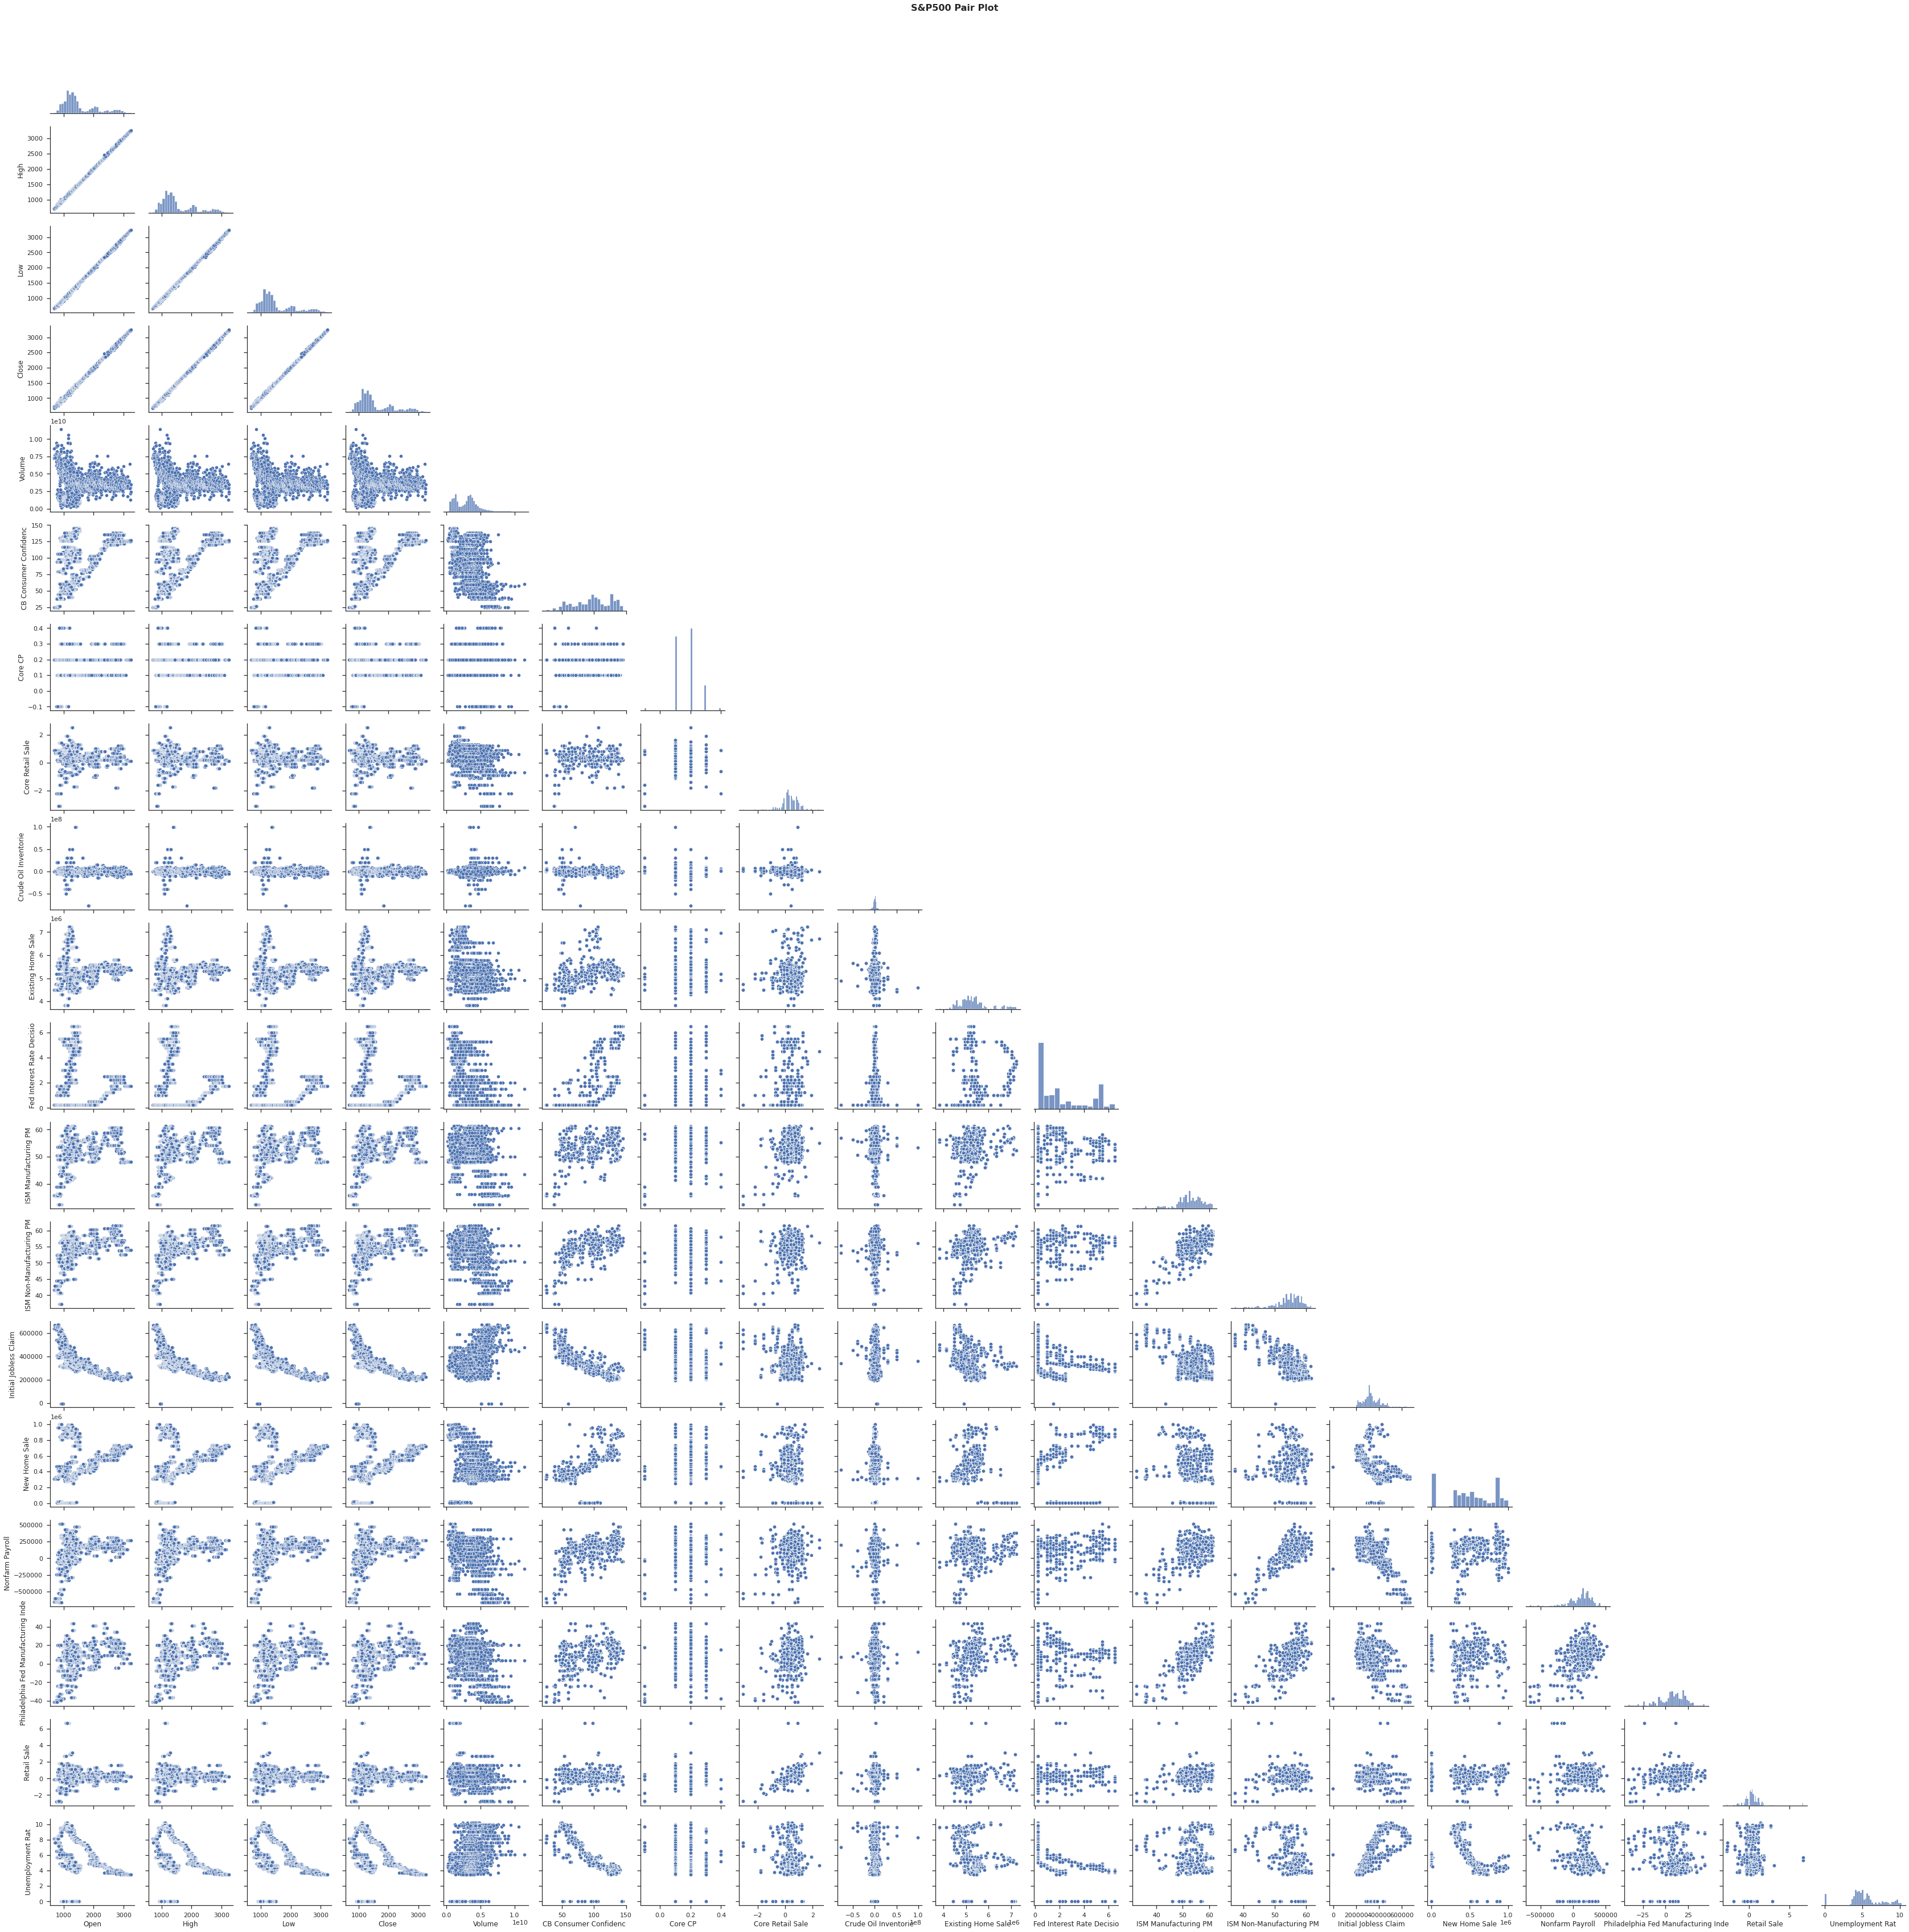

In [13]:
# Print pair plot
columns = sp500_cleaned.columns

sns.set(style="ticks", color_codes=True)
sns.pairplot(sp500_cleaned,vars=columns, dropna=True, corner=True)
plt.suptitle('S&P500 Pair Plot', y=1, fontsize = LARGE_SIZE, fontweight='bold')
plt.savefig('export/sp500_pair_plot.pdf', dpi=600)

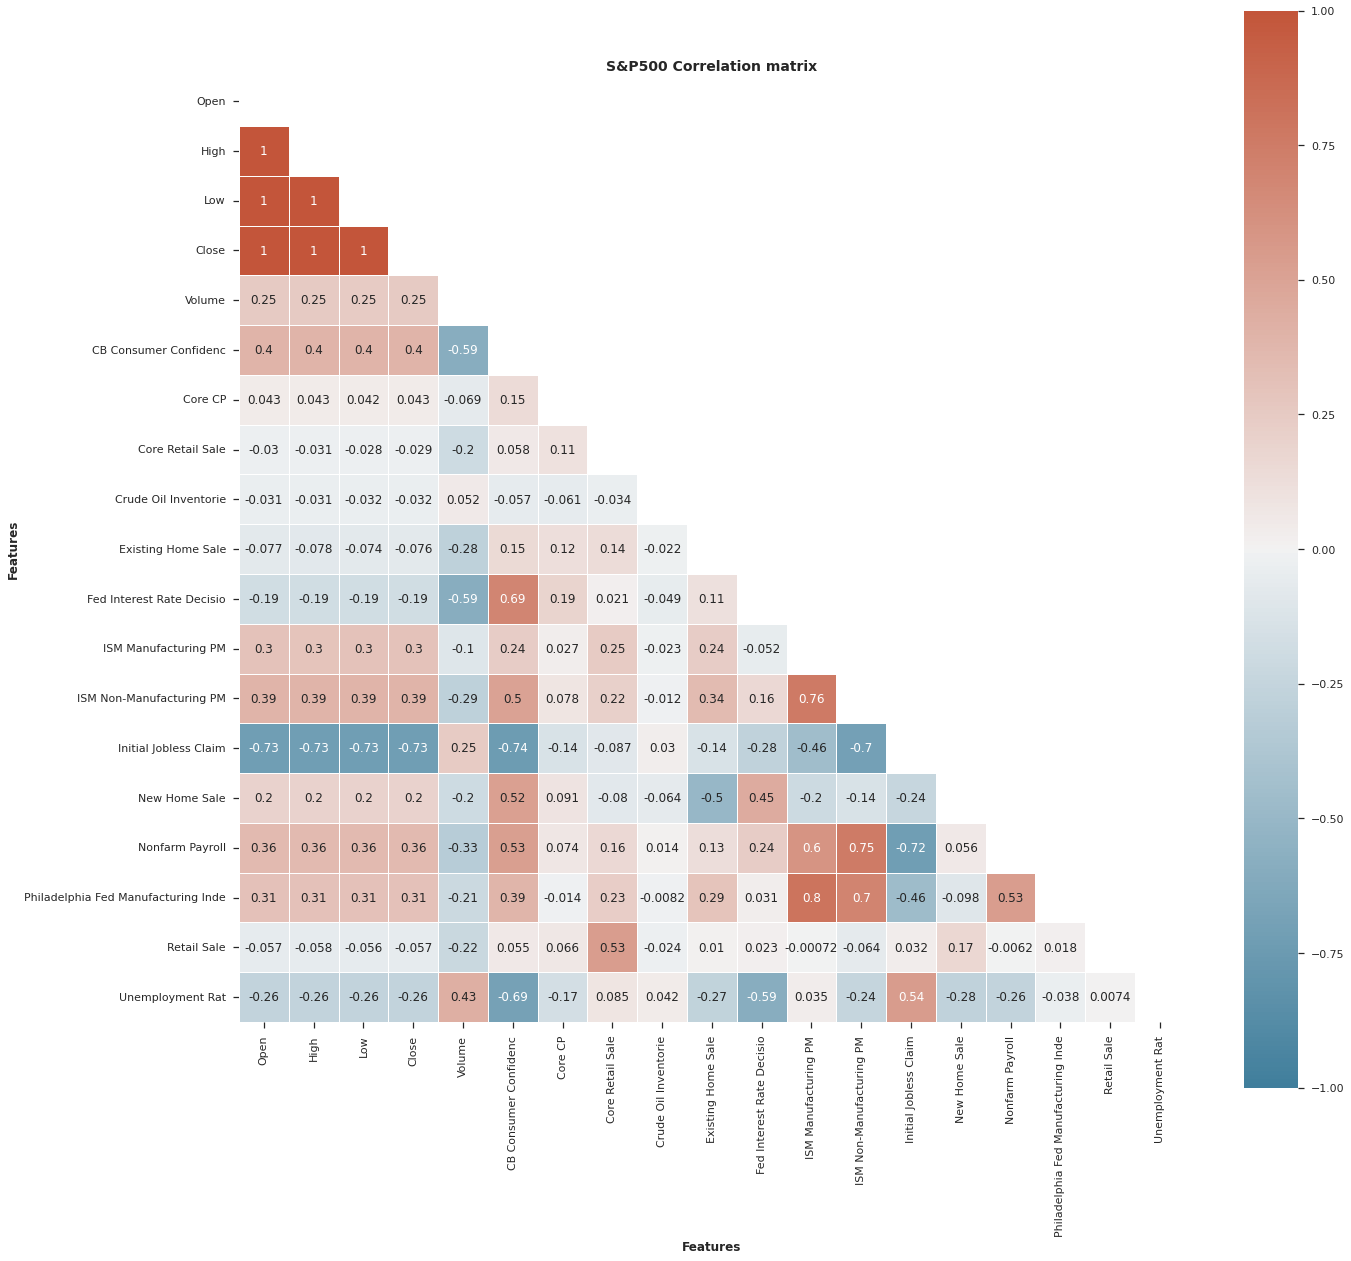

In [14]:
# Print correlation matrix
corr = print_corr_matrix(sp500_cleaned)

In [15]:
# Pair sorting
corr_pairs = corr.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
sorted_pairs.drop_duplicates(inplace=True)

print('----- Strong Positive Pairs -----')
strong_positive_pairs = sorted_pairs[sorted_pairs > 0.5]
strong_positive_pairs.drop_duplicates(inplace=True)
print(strong_positive_pairs,'\n')

print('----- Strong Negative Pairs -----')
strong_negative_pairs = sorted_pairs[sorted_pairs < -0.5]
strong_negative_pairs.drop_duplicates(inplace=True)
print(strong_negative_pairs,'\n \n')

----- Strong Positive Pairs -----
CB Consumer Confidenc                ISM Non-Manufacturing PM               0.502259
                                     New Home Sale                          0.515820
Nonfarm Payroll                      CB Consumer Confidenc                  0.525608
Retail Sale                          Core Retail Sale                       0.532434
Nonfarm Payroll                      Philadelphia Fed Manufacturing Inde    0.533979
Unemployment Rat                     Initial Jobless Claim                  0.542066
Nonfarm Payroll                      ISM Manufacturing PM                   0.596788
Fed Interest Rate Decisio            CB Consumer Confidenc                  0.694969
ISM Non-Manufacturing PM             Philadelphia Fed Manufacturing Inde    0.700418
                                     Nonfarm Payroll                        0.751353
                                     ISM Manufacturing PM                   0.762843
Philadelphia Fed Manufacturing 

By observation of visualized correlation matrix and extracted correlating pairs it was decided to remove from the dataset another features which has the weakest correlation. These are *Core CP*, *Crude Oil Inventorie*, *Retail Sale* and *Core Retail Sale*

In [16]:
# Drop non-correlating features
sp500_cleaned.drop(columns=['Core CP', 'Crude Oil Inventorie', 'Retail Sale', 'Core Retail Sale'], inplace=True)

In [17]:
# Save dataset
sp500_cleaned.to_pickle('data/sp500_cleaned.pickle')

#### 2.5 Outliers detection and data consistency verification <a name="outliers"></a>

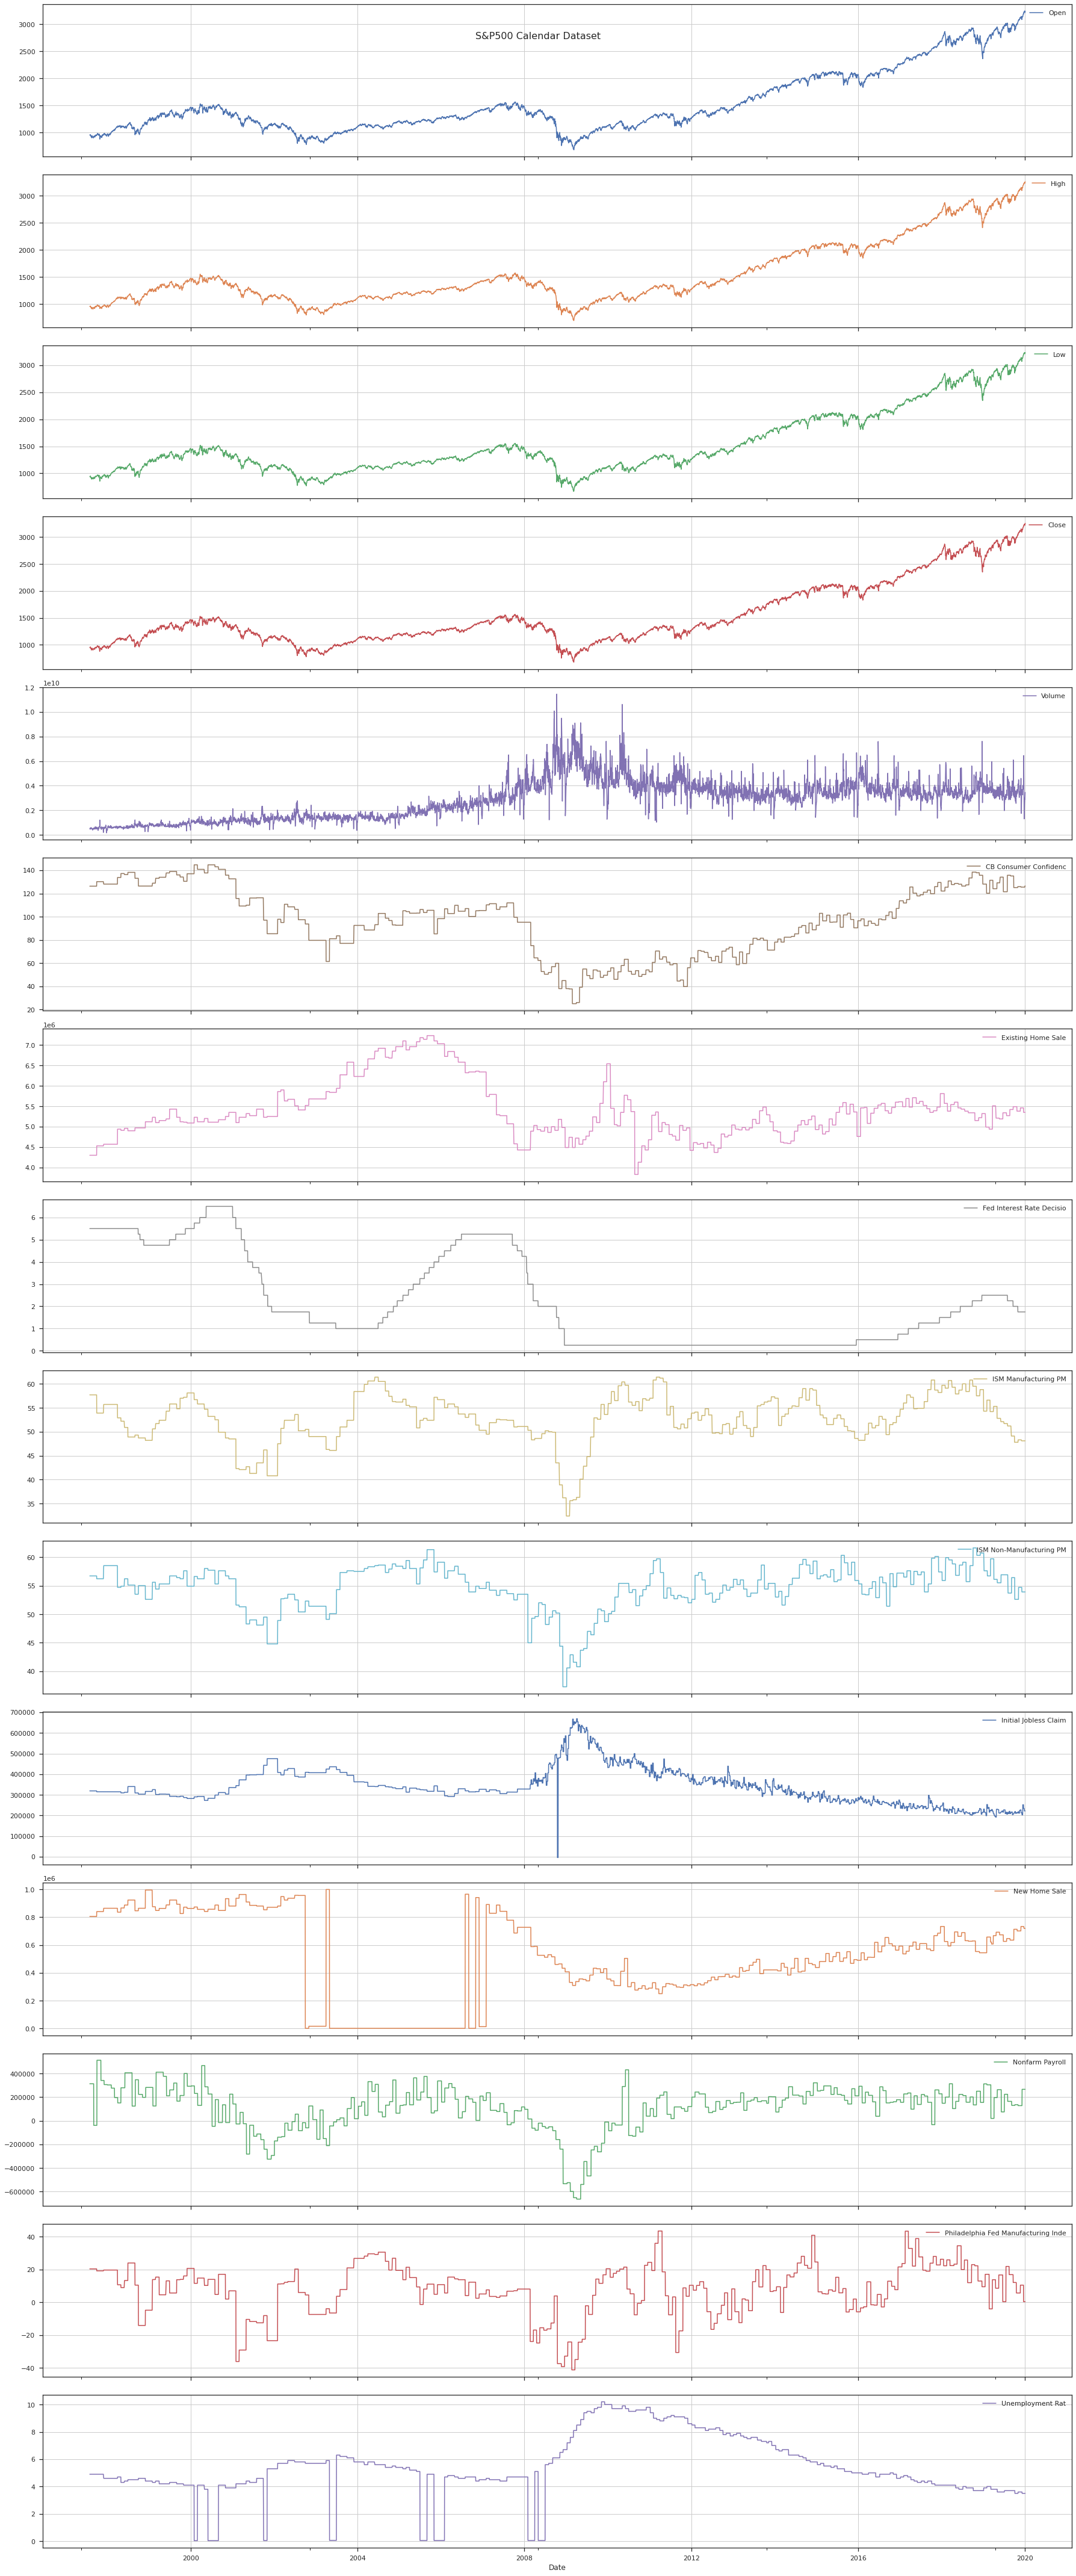

In [18]:
sp500_cleaned.plot(kind='line', subplots=True, grid=True, title="S&P500 Calendar Dataset",
    sharex=True, sharey=False, legend=False, figsize=(25,60))

for ax in plt.gcf().axes:
    ax.legend(loc=1)
plt.tight_layout()
plt.savefig('export/sp500_plots.pdf', dpi=600)

From plotted time-series is possible to recognize local value drops in case of several features, namely *Initial Jobless Claim*, *New Home Sale* and *Unemployment Rat*. To fix this issue, it was decided to impute last value before drop happened and continue imputation till drop ends.

In [19]:
# Fixing values inconsistency
sp500_fill = fix_inconsistency(sp500_cleaned)

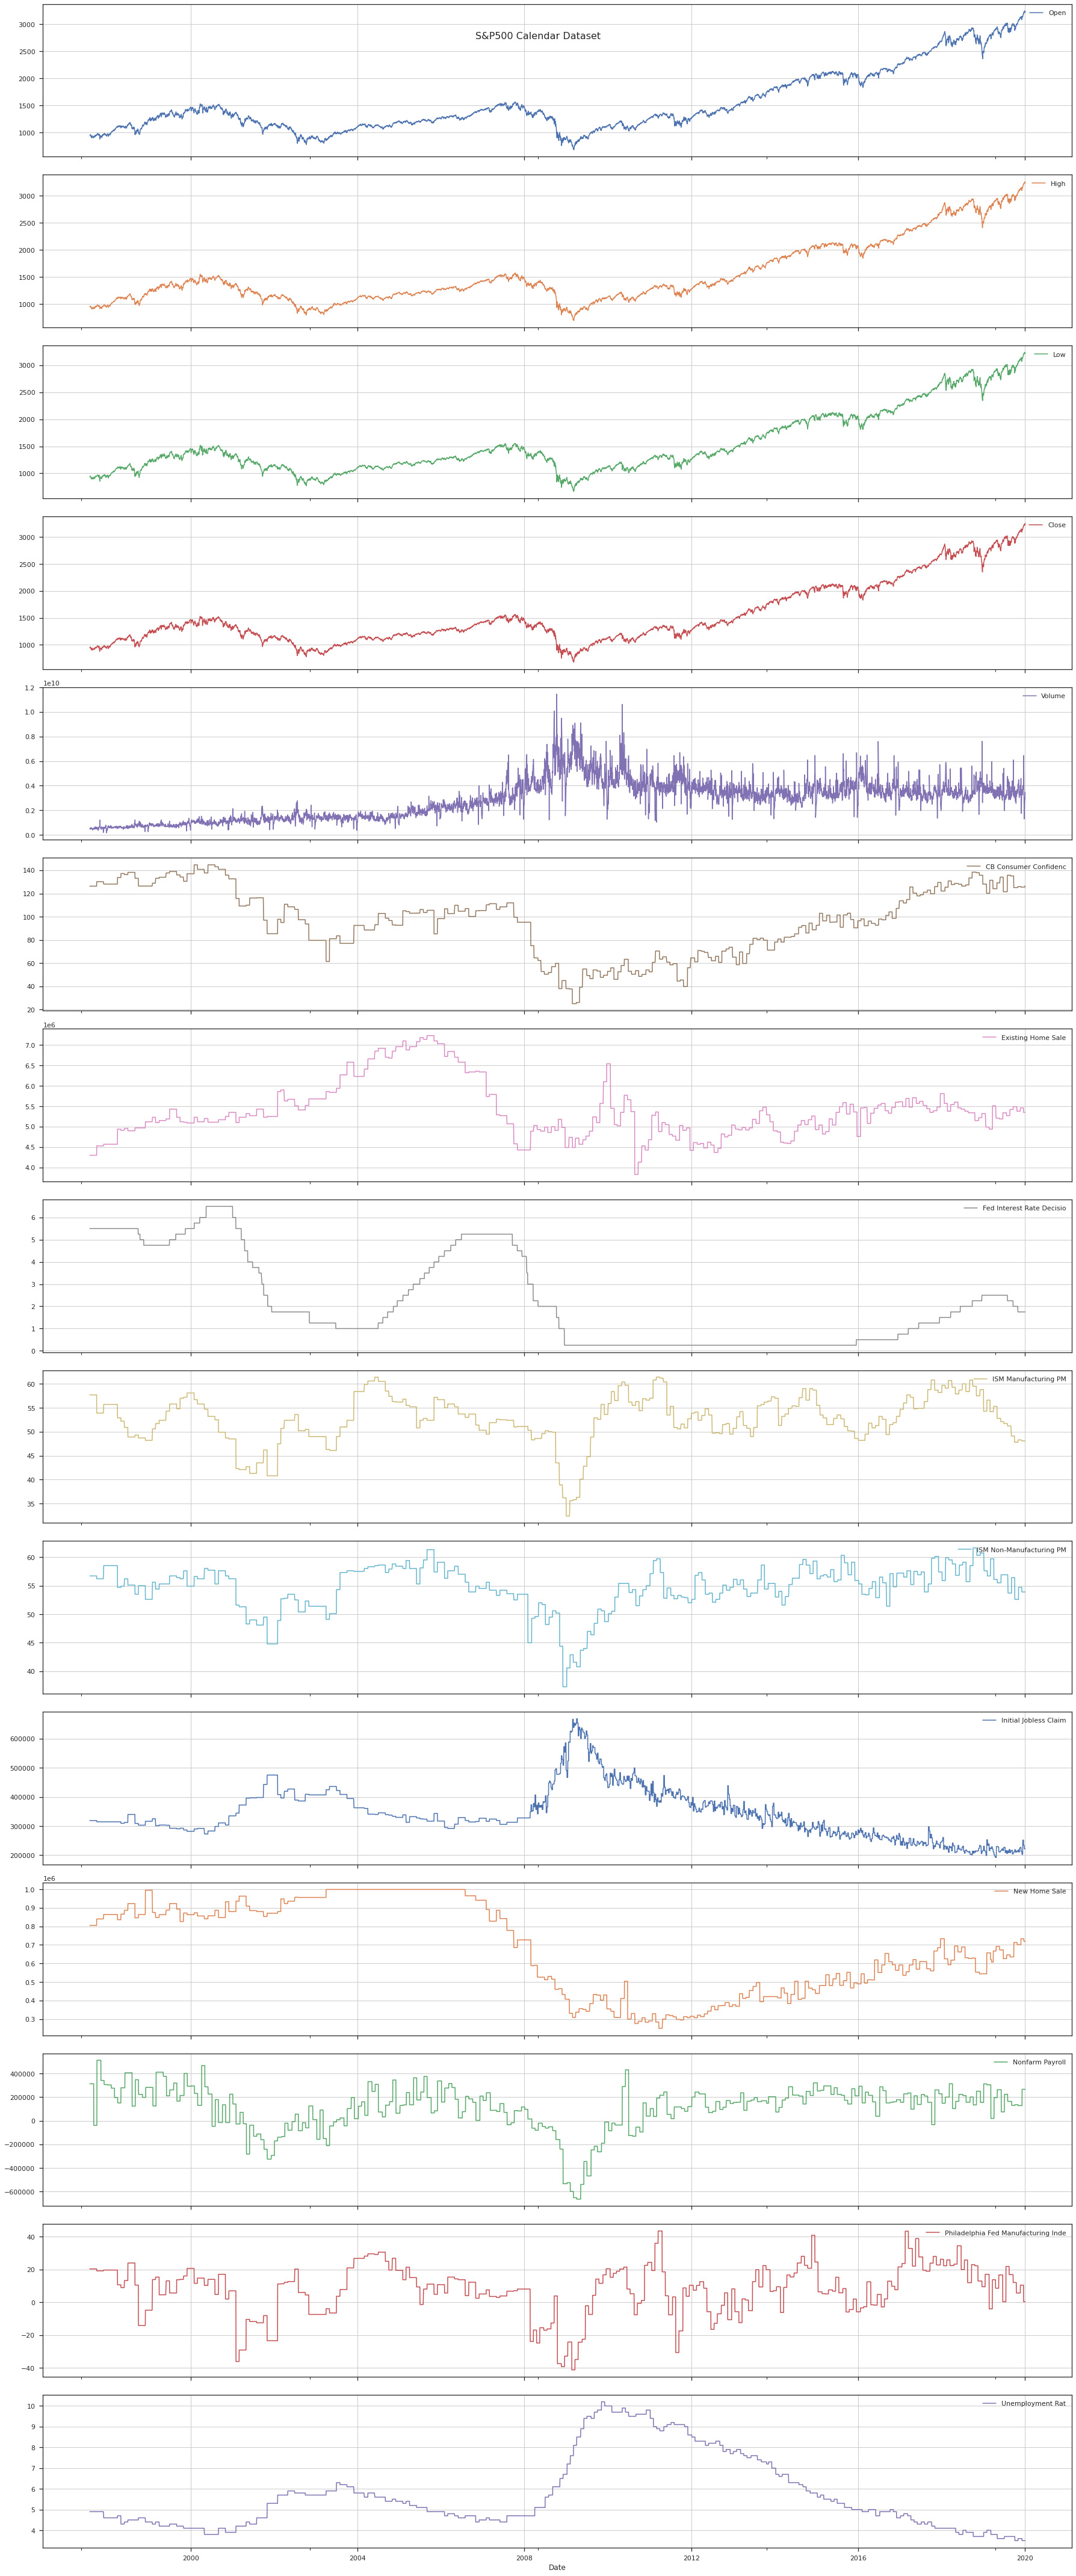

In [20]:
# Check the fixed inconsistency
sp500_fill.plot(kind='line', subplots=True, grid=True, title="S&P500 Calendar Dataset",
    sharex=True, sharey=False, legend=False, figsize=(25,60))

for ax in plt.gcf().axes:
    ax.legend(loc=1)
plt.tight_layout()
plt.savefig('export/sp500_plots_fill.pdf', dpi=600)

### 3. Statistical evaluation - Closing price <a name="close-statistic"></a>

#### 3.1 Additive Decomposition <a name="close-decomposition"></a>

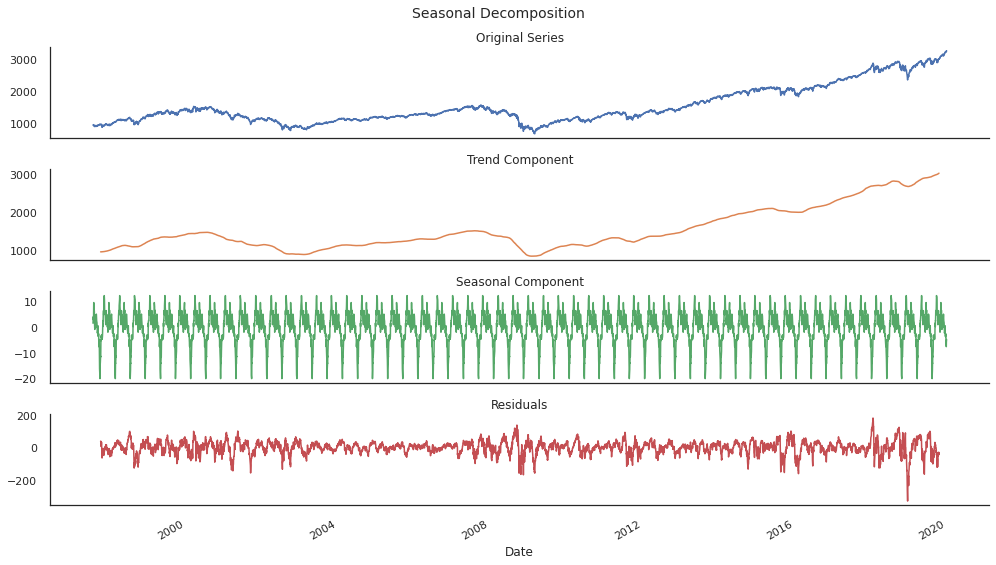

In [21]:
# Printing seasonal decomposition
close_series = seasonal_decomposition(sp500_fill,'Close', 100)

#### 3.2 Stationarity check <a name="close-stationarity"></a>

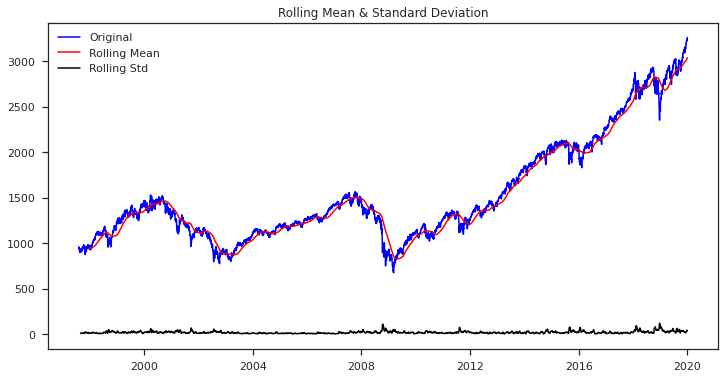

Results of Dickey-Fuller Test:
Test Statistic                    1.334921
p-value                           0.996797
#Lags Used                       18.000000
Number of Observations Used    5623.000000
Critical Value (1%)              -3.431513
Critical Value (5%)              -2.862054
Critical Value (10%)             -2.567044
dtype: float64


In [22]:
# Run stationarity check
stationarity_check(close_series)

#### 3.3 Correlogram <a name="close-correlogram"></a>

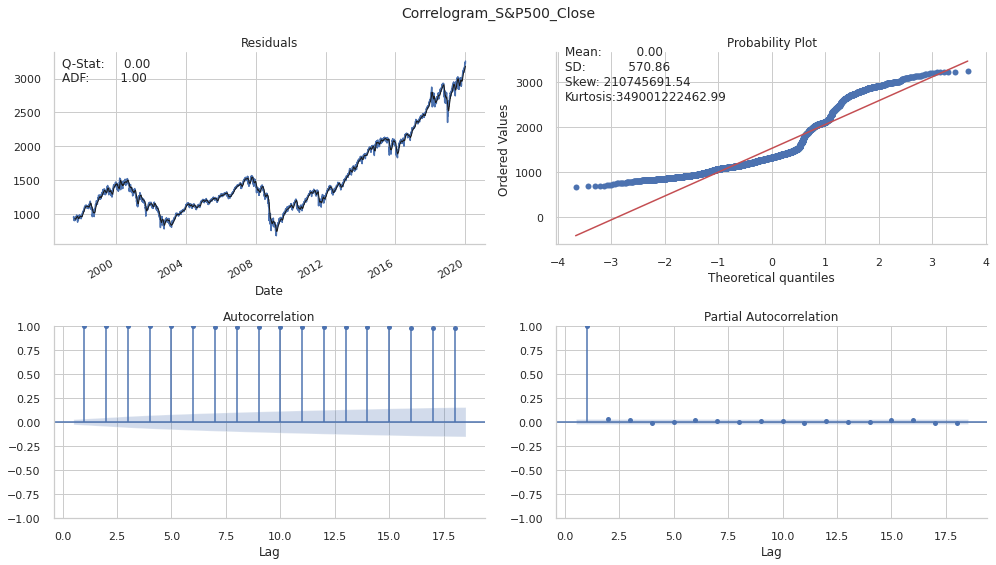

In [23]:
# Plot correlogram
plot_correlogram(close_series, lags=18, title='Correlogram_S&P500_Close')

### 4. Statistical evaluation - Volume <a name="volume-statistic"></a>

#### 4.1 Additive Decomposition <a name="volume-decomposition"></a>

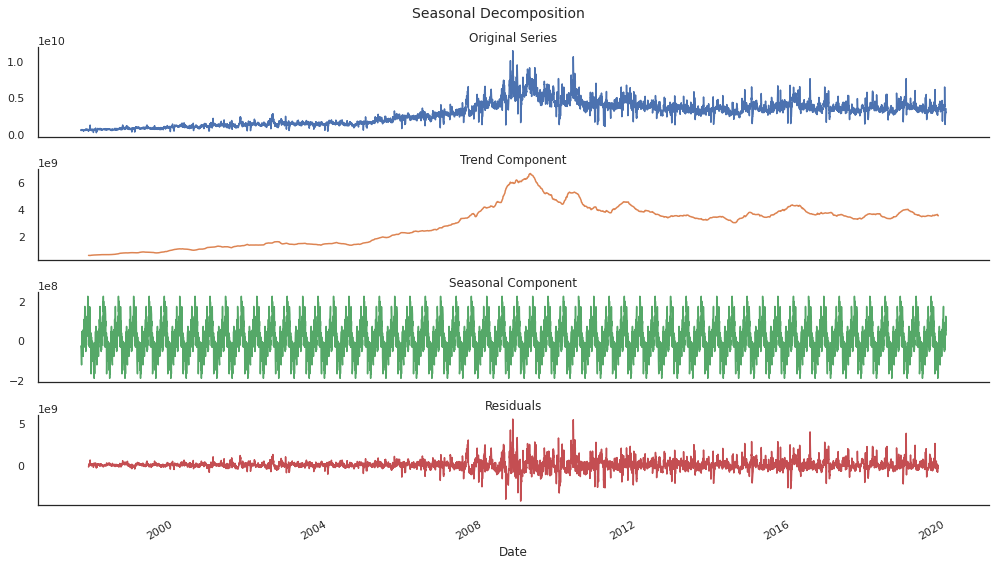

In [24]:
# Printing seasonal decomposition
volume_series = seasonal_decomposition(sp500_fill,'Volume', 100)

#### 4.2 Stationarity check <a name="volume-stationarity"></a>

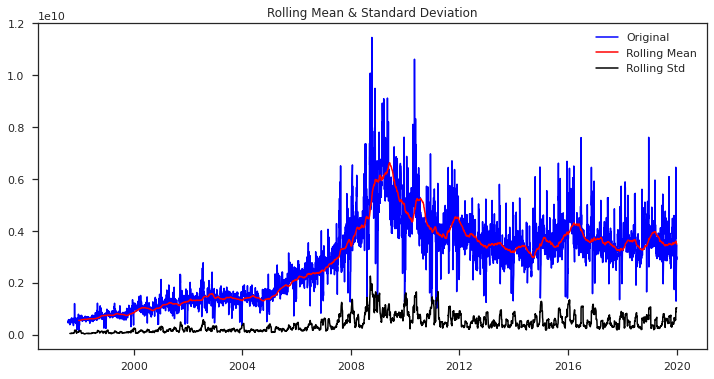

Results of Dickey-Fuller Test:
Test Statistic                   -2.307940
p-value                           0.169420
#Lags Used                       33.000000
Number of Observations Used    5608.000000
Critical Value (1%)              -3.431517
Critical Value (5%)              -2.862056
Critical Value (10%)             -2.567044
dtype: float64


In [25]:
# Run stationarity check
stationarity_check(volume_series)

#### 4.3 Correlogram <a name="volume-correlogram"></a>

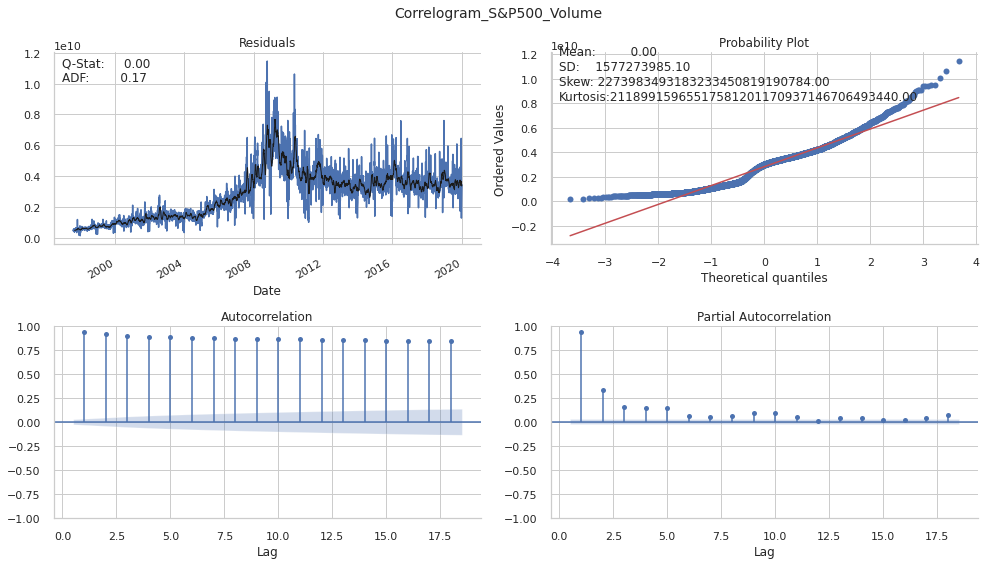

In [26]:
# Plot correlogram
plot_correlogram(volume_series, lags=18, title='Correlogram_S&P500_Volume')

In [27]:
# Save dataset
sp500_fill.to_pickle('data/sp500_fill.pickle')

### 5. Feature engineering <a name="feature-eng"></a>

Script `add_features.py` is responsible for calculating and adding new features into dataset and creating predefined number of lags from all features to capture time dependency.

New features added into dataset are:
* Returns
* Simple moving average
* Momentum
* Rolling minimum
* Rolling maximum
* Rolling volatility

Parameters like *nr. of lags* or *rolling window* can be further tuned in the script.

In [28]:
# Add features and lagged data
%run lib/add_features.py

# Show processed df
sp500

Calculating features...
Features calculation finished in: 0:00:00


Open     High      Low    Close        Volume  \
Date                                                           
1997-12-31   970.84   975.02   967.41   970.43  4.672800e+08   
1998-01-02   970.43   975.04   965.73   975.04  3.667300e+08   
1998-01-05   975.04   982.63   969.00   977.07  6.280700e+08   
1998-01-06   977.07   977.07   962.68   966.58  6.183600e+08   
1998-01-07   966.58   966.58   952.67   964.00  6.673900e+08   
...             ...      ...      ...      ...           ...   
2019-12-26  3227.20  3240.08  3227.20  3239.91  2.160680e+09   
2019-12-27  3247.23  3247.93  3234.37  3240.02  2.428670e+09   
2019-12-30  3240.09  3240.92  3216.57  3221.29  3.013290e+09   
2019-12-31  3215.18  3231.72  3212.03  3230.78  2.893810e+09   
2020-01-02  3244.67  3258.14  3235.53  3257.85  3.458250e+09   

            CB Consumer Confidenc  Existing Home Sale  \
Date                                                    
1997-12-31                  128.1           4570000.0   
1998-01-02                  128.1           4570000.0   
1998-01-05                  128.1           4570000.0   
1998-01-06                  128.1           4570000.0   
1998-01-07                  128.1           4570000.0   
...                           ...                 ...   
2019-12-26                  125.5           5350000.0   
2019-12-27                  125.5           5350000.0   
2019-12-30                  125.5           5350000.0   
2019-12-31                  126.5           5350000.0   
2020-01-02                  126.5           5350000.0   

            Fed Interest Rate Decisio  ISM Manufacturing PM  \
Date                                                          
1997-12-31                       5.50                  55.7   
1998-01-02                       5.50                  55.7   
1998-01-05                       5.50                  55.7   
1998-01-06                       5.50                  55.7   
1998-01-07                       5.50                  55.7   
...                               ...                   ...   
2019-12-26                       1.75                  48.1   
2019-12-27                       1.75                  48.1   
2019-12-30                       1.75                  48.1   
2019-12-31                       1.75                  48.1   
2020-01-02                       1.75                  48.1   

            ISM Non-Manufacturing PM  Initial Jobless Claim  New Home Sale  \
Date                                                                         
1997-12-31                      58.5               315000.0       864000.0   
1998-01-02                      58.5               315000.0       864000.0   
1998-01-05                      58.5               315000.0       864000.0   
1998-01-06                      58.5               315000.0       864000.0   
1998-01-07                      58.5               315000.0       864000.0   
...                              ...                    ...            ...   
2019-12-26                      53.9               222000.0       719000.0   
2019-12-27                      53.9               222000.0       719000.0   
2019-12-30                      53.9               222000.0       719000.0   
2019-12-31                      53.9               222000.0       719000.0   
2020-01-02                      53.9               222000.0       719000.0   

            Nonfarm Payroll  Philadelphia Fed Manufacturing Inde  \
Date                                                               
1997-12-31         306000.0                                 19.6   
1998-01-02         303000.0                                 19.6   
1998-01-05         303000.0                                 19.6   
1998-01-06         303000.0                                 19.6   
1998-01-07         303000.0                                 19.6   
...                     ...                                  ...   
2019-12-26         266000.0                                  

<Figure size 432x288 with 0 Axes>

### 6. Models training <a name="models-training"></a>

For the purpose of comparison of the several models, it was decided to use Scikit-learn library to build training and evaluation pipelines of machine learning models.

ML pipelines incorporates data scaling, randomized search over space of model hyper-parameters with Time-series split cross-validation. Randomized search is evaluated by *neg_mean_absolute_error*, *neg_mean_squared_error* and *neg_root_mean_squared_error* scoring. There are used 4 models in total to perform regression:

* **Random Forest Regressor** - averaging algorithms based on randomized decision trees. Diverse set of classifiers is created by introducing randomness in the classifier construction. The prediction of the ensemble is given as the averaged prediction of the individual classifiers. [ --> more details](#https://scikit-learn.org/stable/modules/ensemble.html#forest)
* **AdaBoost Regressor** - The core principle of AdaBoost is to fit a sequence of weak learners on repeatedly modified versions of the data. The predictions from all of them are then combined through a weighted majority vote (or sum) to produce the final prediction. [ --> more details](#https://scikit-learn.org/stable/modules/ensemble.html#adaboost)
* **Gradient Boosting Regressor** - generalization of boosting to arbitrary differentiable loss functions. GBDT is an accurate and effective off-the-shelf procedure that can be used for both regression and classification problems in a variety of areas including Web search ranking and ecology. [ --> more details](#https://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting)
* **XGBoost Regressor** - is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. [ --> more details](#https://xgboost.readthedocs.io/en/latest/tutorials/model.html)

Evaluation of the model performance is done by bar plots for MAE and MSE scores for each trained model and by comparing ground truth data to predictions.

#### 6.1 Training of the multiple models <a name="training"></a>

Script `models_training.py` is responsible for training and evaluation of all models and contains all relevant input parameters, hyper-parameters space definition and scoring conditions including plotting learning curves and comparison of testing and predicted data.

Training all models...


Training the Random_Forest_Tree model...

Fitting 3 folds for each of 1 candidates, totalling 3 fits


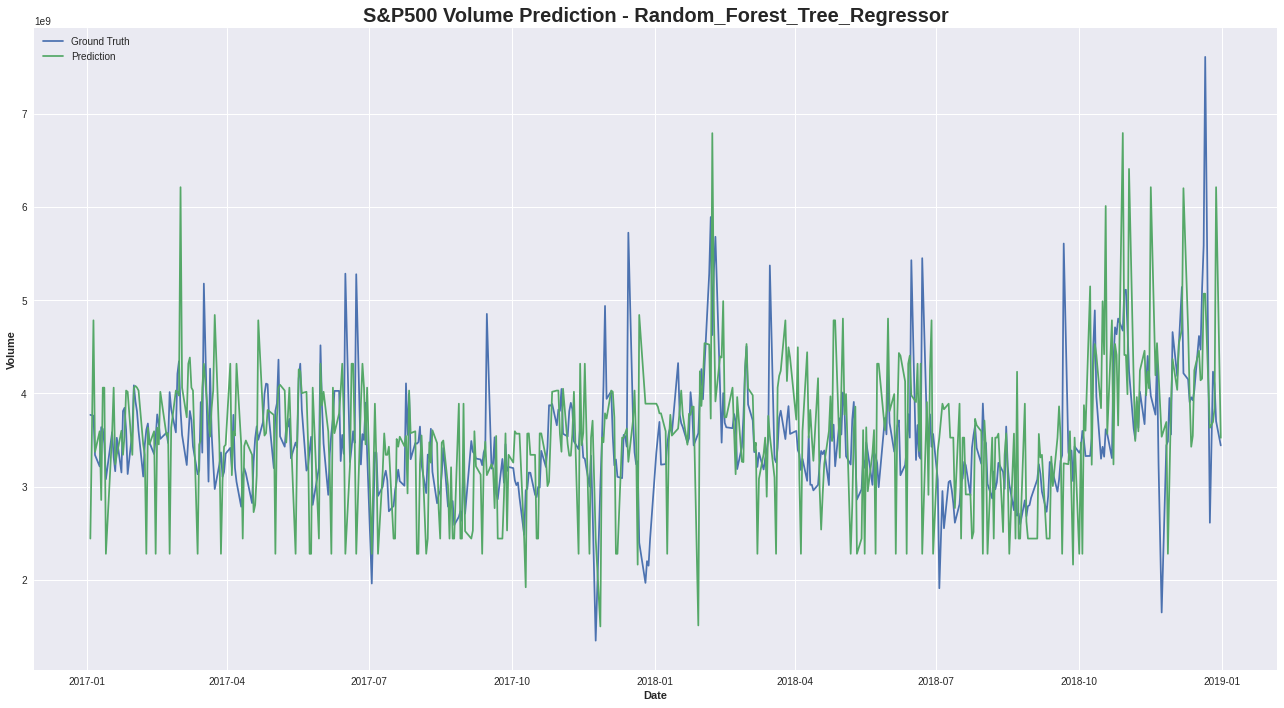


------ The best parameters of the Random_Forest_Tree model are: ------
Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestRegressor(bootstrap=False, max_depth=90,
                                       min_samples_leaf=2, n_estimators=550))])
--------------------------------------------------
The best cross-validation score: -3.513741208023769e+18
MSE: 794646824
MAE: 24225
--------------------------------------------------

Random_Forest_Tree model training finished in: 0:05:10

Training the Ada_Boost model...

Fitting 3 folds for each of 1 candidates, totalling 3 fits


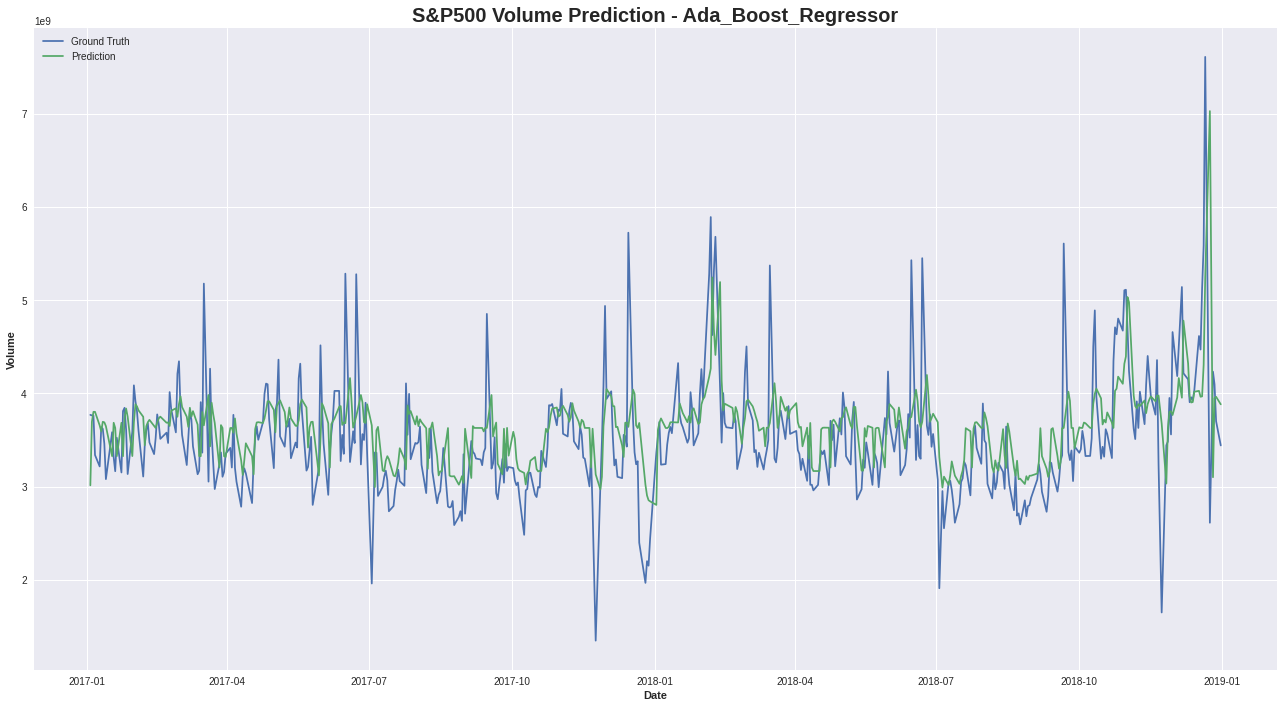


------ The best parameters of the Ada_Boost model are: ------
Pipeline(steps=[('scaler', StandardScaler()),
                ('ab',
                 AdaBoostRegressor(learning_rate=0.007274917088027809,
                                   n_estimators=750))])
--------------------------------------------------
The best cross-validation score: -2.442633208391374e+18
MSE: 541270327
MAE: 19415
--------------------------------------------------

Ada_Boost model training finished in: 0:01:39

Training the Gradient_Boost model...

Fitting 3 folds for each of 1 candidates, totalling 3 fits


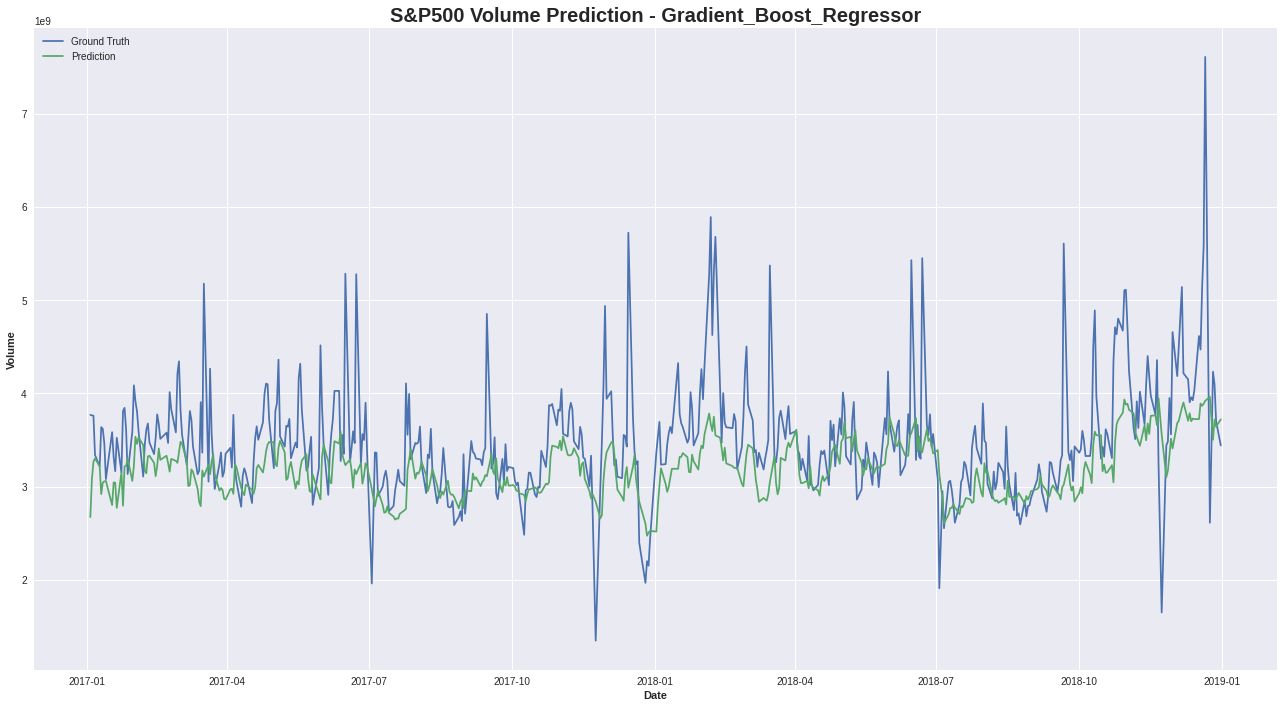


------ The best parameters of the Gradient_Boost model are: ------
Pipeline(steps=[('scaler', StandardScaler()),
                ('gb',
                 GradientBoostingRegressor(criterion='squared_error',
                                           learning_rate=0.007274917088027809,
                                           max_depth=110, max_features='log2',
                                           n_estimators=350))])
--------------------------------------------------
The best cross-validation score: -4.0747508092018975e+18
MSE: 614519868
MAE: 20680
--------------------------------------------------

Gradient_Boost model training finished in: 0:00:14

Training the XGboost model...

Fitting 3 folds for each of 1 candidates, totalling 3 fits


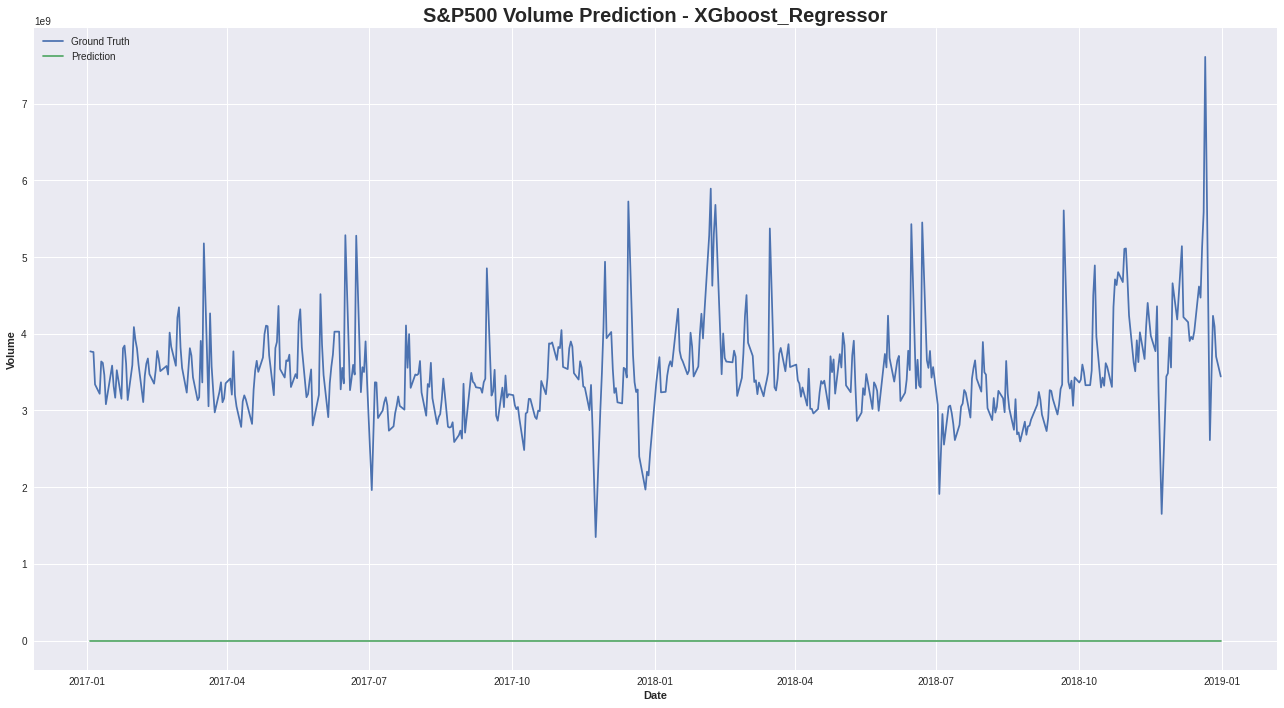


------ The best parameters of the XGboost model are: ------
Pipeline(steps=[('scaler', StandardScaler()),
                ('xgbm',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, enable_categorical=False,
                              gamma=0.3, gpu_id=-1, importance_type=None,
                              interaction_constraints='',
                              learning_rate=0.15403596595019248,
                              max_delta_step=8, max_depth=4, min_child_weight=5,
                              missing=nan, monotone_constraints='()',
                              n_estimators=350, n_jobs=8, num_parallel_tree=1,
                              predictor='auto', random_state=0, reg_alpha=0.01,
                              reg_lambda=1, scale_pos_weight=1, subsample=1.0,
                              tree_method='exact', validate_parameters=

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  18 | elapsed:  1.3min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  2.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[learning_curve] Training set sizes: [ 119  335  550  766  981 1197]


[Parallel(n_jobs=-1)]: Done   9 out of  18 | elapsed:   41.7s remaining:   41.7s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[learning_curve] Training set sizes: [ 119  335  550  766  981 1197]


[Parallel(n_jobs=-1)]: Done   9 out of  18 | elapsed:    4.7s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    8.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[learning_curve] Training set sizes: [ 119  335  550  766  981 1197]
[CV] END gb__criterion=squared_error, gb__learning_rate=0.007274917088027809, gb__loss=squared_error, gb__max_depth=110, gb__max_features=log2, gb__min_samples_leaf=1, gb__min_samples_split=2, gb__n_estimators=350; total time=   1.3s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END rf__bootstrap=False, rf__criterion=squared_error, rf__max_depth=90, rf__max_features=auto, rf__min_samples_leaf=2, rf__min_samples_split=2, rf__n_estimators=550; total time=   9.7s
[CV] END rf__bootstrap=False, rf__criterion=squared_error, rf__max_depth=90, rf__max_features=auto, rf__min_samples_leaf=2, rf__min_samples_split=2, rf__n_estimators=550; total time=  19.0s
[CV] END rf__bootstrap=False, rf__criterion=squared_error, rf__max_depth=90, rf__max_features=auto, rf__min_samples_leaf=2, rf__min_samples_split=2, rf__n_estimators=550; total time=  27.2s
[CV] END .................................................... total 

[Parallel(n_jobs=-1)]: Done   9 out of  18 | elapsed:  1.9min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  2.2min finished


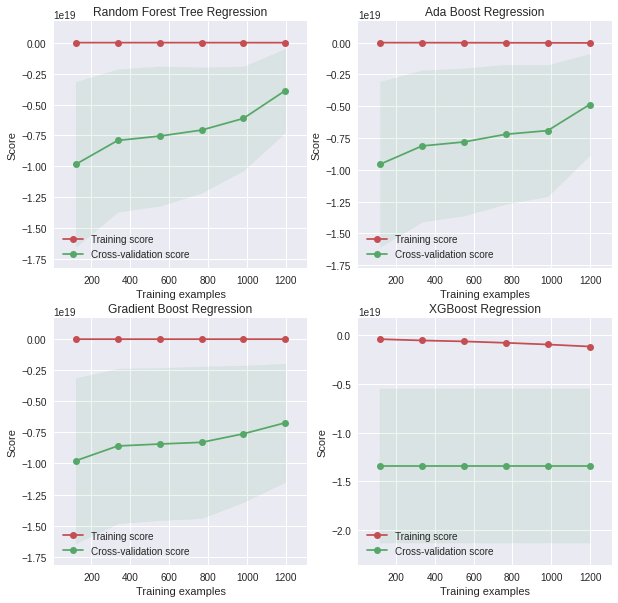


Learning curves plotted in: 0:06:08

All models trained in: 0:13:39


<Figure size 576x396 with 0 Axes>

In [29]:
# Load and extract data from raw CSVs into dataframes for S&P500 and relevant events
%run lib/models_training.py

#### 6.2 Dataset with predicted values finalization <a name="finalization"></a>

As a last step is performed merge of testing dataset with predicted volumes for each particular model. Finally, the whole dataframe is exported into `sp500_eval_data.csv` file.

In [30]:
# Selecting the prices and features
sp500_eval = X_test[X_test.columns[:20]]

In [31]:
# Concatenate dataframes
sp500_eval = concat_df(sp500_eval, y_test, '')  # Concatenating the ground truth volume
sp500_eval = concat_df(sp500_eval, rf_y_pred, '-Random Forest pred')  # Concatenating the Random Forest volume
sp500_eval = concat_df(sp500_eval, ab_y_pred, '-Ada Boost pred')  # Concatenating the Ada Boost volume
sp500_eval = concat_df(sp500_eval, gb_y_pred, '-Gradient Boost pred')  # Concatenating the Gradient Boost volume
sp500_eval = concat_df(sp500_eval, xgbm_y_pred, '-XGBoost pred')  # Concatenating the XGBoost volume

In [32]:
# Export to csv
sp500_eval.to_csv('export/sp500_eval_data.csv', header=True)

### 7. Results discussion <a name="results-discussion"></a>

In [33]:
# Creating the MAE and MSE scores datasets
scores_mae = {'Random Forest Tree': rf_eval[1],
        'Ada Boost': ab_eval[1],
        'Gradient Boost': gb_eval[1],
        'XGBoost': xgbm_eval[1]}

scores_mse = {'Random Forest Tree': rf_eval[0],
        'Ada Boost': ab_eval[0],
        'Gradient Boost': gb_eval[0],
        'XGBoost': xgbm_eval[0]}

In [34]:
# Print MAE Scores
scores_mae

{'Random Forest Tree': 24225,
 'Ada Boost': 19415,
 'Gradient Boost': 20680,
 'XGBoost': 59265}

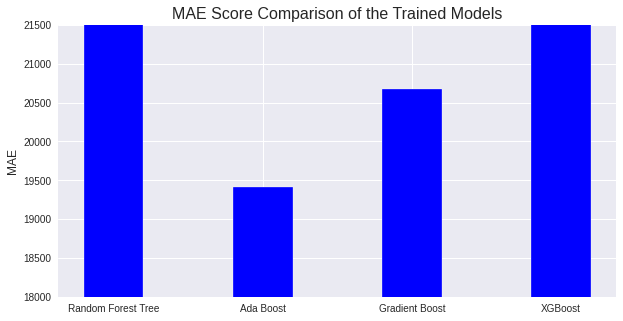

In [35]:
# Plot MAE Scores
print_score(scores_mae,'MAE',[18000, 21500], 'blue')

In [36]:
# Print MSE Scores
scores_mse

{'Random Forest Tree': 794646824,
 'Ada Boost': 541270327,
 'Gradient Boost': 614519868,
 'XGBoost': 3565971554}

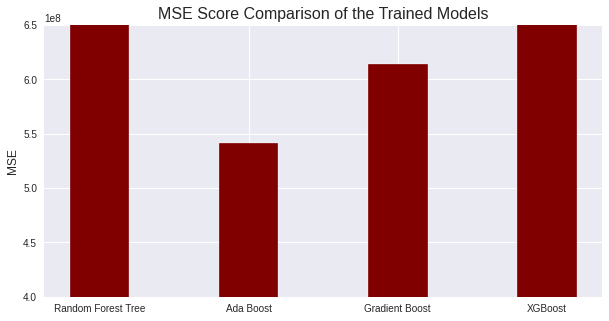

In [37]:
# Plot MSE Scores
print_score(scores_mse,'MSE',[4e8, 6.5e8], 'maroon')

Based on observing *ROC* comparison plots, it is apparent that due to small dataset, there is not enough points to plot smooth curves.

It is however still possible to recognize that all models **ranges its AUC from 60 to 75**. This can be considered as poor performance with potential for improvement. Although final micro averaged scores may with each run of the randomized search vary, Decision Trees and KNeighbor models has on multiple runs the weakest performance of all. On the other hand, Random Forest classifier usually has slight edge over the Linear regression model.

From *ROC* comparison plots for each target can be seen that in majority of the runs the *Common newt* and *Green frog* targets has the amongst of top AUC.

### 8. Conclusion <a name="conclusion"></a>

There has been performed exploratory data analysis with trained and mutually compared models for a classification task on the Amphibians dataset.

Initial dataset exploration covered investigation of the data distribution, missing data and correlation pairs. Next, there were identified and removed outliers. Another step was improvement of the data imbalances by incorporating categorical labels encoding and algorithm for multi-label oversampling. Such a modified dataset was used as input for training and evaluation pipelines of linear, tree based, nearest neighbors and ensemble models. Performance of the models was mutually compared. Lastly, all predictions are finalized in dataset end exported.

Although there are differences between model performance, in general all of them perform poorly. The main reason can be seen in very small amount of data which were obtained for the dataset. To have at least several thousands of data points would have positive impact on the whole workflow of how analysis was handled. It would be possible to use resampling techniques instead oversampling for multi-labeled data to improve data balance more significantly. It would also allow more intense training of the models and investigate more in depth difference between their performance.

There is still lot of space for hyperparemetes tuning and model scoring part. For example it can be considered searching for optimal parameters with successive halving.

To improve models performance, I would see the potential for the future work according to following priorities:
1. Acquire more data
2. Improve targets balance even more
3. Training pipelines tuning
4. Possible feature engineering
